# PART A: Define the problem

### Context

In the realm of modern finance, businesses encounter the perpetual challenge of managing debt obligations effectively to maintain a favorable credit standing and foster sustainable growth. Investors keenly scrutinize companies capable of navigating financial complexities while ensuring stability and profitability. A pivotal instrument in this evaluation process is the balance sheet, which provides a comprehensive overview of a company's assets, liabilities, and shareholder equity, offering insights into its financial health and operational efficiency. In this context, leveraging available financial data, particularly from preceding fiscal periods, becomes imperative for informed decision-making and strategic planning.SE: Company's current stock price divided by its earnings per share

### Objective

A group of venture capitalists want to develop a Financial Health Assessment Tool. With the help of the tool, it endeavors to empower businesses and investors with a robust mechanism for evaluating the financial well-being and creditworthiness of companies. By harnessing machine learning techniques, they aim to analyze historical financial statements and extract pertinent insights to facilitate informed decision-making via the tool. Specifically, they foresee facilitating the following with the help of the tool:

Debt Management Analysis: Identify patterns and trends in debt management practices to assess the ability of businesses to fulfill financial obligations promptly and efficiently, and identify potential cases of default.
Credit Risk Evaluation: Evaluate credit risk exposure by analyzing liquidity ratios, debt-to-equity ratios, and other key financial indicators to ascertain the likelihood of default and inform investment decisions.
They have hired you as a data scientist and provided you with the financial metrics of different companies. The task is to analyze the data provided and develop a predictive model leveraging machine learning techniques to identify whether a given company will be tagged as a defaulter in terms of net worth next year. The predictive model will help the organization anticipate potential challenges with the financial performance of the companies and enable proactive risk mitigation strategies.

### Data Dictionary

The data consists of financial metrics from the balance sheets of different companies. The detailed data dictionary is given below.

- Networth Next Year: Net worth of the customer in the next year

- Total assets: Total assets of customer

- Net worth: Net worth of the customer of the present year

- Total income: Total income of the customer

- Change in stock: Difference between the current value of the stock and the value of stock in the last trading day

- Total expenses: Total expenses done by the customer

- Profit after tax: Profit after tax deduction

- PBDITA: Profit before depreciation, income tax, and amortization

- PBT: Profit before tax deduction

- Cash profit: Total Cash profit

- PBDITA as % of total income: PBDITA / Total income

- PBT as % of total income: PBT / Total income

- PAT as % of total income: PAT / Total income

- Cash profit as % of total income: Cash Profit / Total income

- PAT as % of net worth: PAT / Net worth

- Sales: Sales done by the customer

- Income from financial services: Income from financial services

- Other income: Income from other sources

- Total capital: Total capital of the customer

- Reserves and funds: Total reserves and funds of the customer

- Borrowings: Total amount borrowed by the customer

- Current liabilities & provisions: current liabilities of the customer

- Deferred tax liability: Future income tax customer will pay because of the current transaction

- Shareholders funds: Amount of equity in a company which belongs to shareholders

- Cumulative retained profits: Total cumulative profit retained by customer

- Capital employed: Current asset minus current liabilities

- TOL/TNW: Total liabilities of the customer divided by Total net worth

- Total term liabilities / tangible net worth: Short + long term liabilities divided by tangible net worth

- Contingent liabilities / Net worth (%): Contingent liabilities / Net worth

- Contingent liabilities: Liabilities because of uncertain events

- Net fixed assets: The purchase price of all fixed assets

- Investments: Total invested amount

- Current assets: Assets that are expected to be converted to cash within a year

- Net working capital: Difference between the current liabilities and current assets

- Quick ratio (times): Total cash divided by current liabilities

- Current ratio (times): Current assets divided by current liabilities

- Debt to equity ratio (times): Total liabilities divided by its shareholder equity

- Cash to current liabilities (times): Total liquid cash divided by current liabilities

- Cash to average cost of sales per day: Total cash divided by the average cost of the sales

- Creditors turnover: Net credit purchase divided by average trade creditors

- Debtors turnover: Net credit sales divided by average accounts receivable

- Finished goods turnover: Annual sales divided by average inventory

- WIP turnover: The cost of goods sold for a period divided by the average inventory for that period

- Raw material turnover: Cost of goods sold is divided by the average inventory for the same period

- Shares outstanding: Number of issued shares minus the number of shares held in the company

- Equity face value: cost of the equity at the time of issuing

- EPS: Net income divided by the total number of outstanding share

- Adjusted EPS: Adjusted net earnings divided by the weighted average number of common shares outstanding on a diluted basis during the plan year

- Total liabilities: Sum of all types of liabilities

- PE on BSE: Company's current stock price divided by its earnings per share

## Import Libraries

In [3]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style
import seaborn as sns

from scipy.stats import zscore                                        # ZSCORE SCALING
from sklearn.preprocessing import StandardScaler                      # ZScore
from sklearn.preprocessing import MinMaxScaler                        # Min Max Scaler

from sklearn.linear_model import LogisticRegression                   # Logistic Regression

from sklearn import metrics, model_selection                          # Evaluation Metrics
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,accuracy_score,roc_auc_score,roc_curve, precision_recall_curve

from sklearn.model_selection import train_test_split, GridSearchCV    # Train test Split and Grid Search


%matplotlib inline
sns.set(color_codes=True)
sns.set_palette('Accent_r')

%config InlineBackend.figure_format ='retina'

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

### Load Dataset and perform Exploratory Data Analysis

In [6]:
df = pd.read_csv('Comp_Fin_Data.csv')
df.head()

Num  Networth Next Year  Total assets  Net worth  Total income  Change in stock  Total expenses  Profit after tax  PBDITA    PBT  Cash profit  PBDITA as % of total income  PBT as % of total income  PAT as % of total income  Cash profit as % of total income  PAT as % of net worth   Sales  Income from fincial services  Other income  Total capital  Reserves and funds  Borrowings  Current liabilities & provisions  Deferred tax liability  Shareholders funds  Cumulative retained profits  Capital employed  TOL/TNW  Total term liabilities / tangible net worth  Contingent liabilities / Net worth (%)  Contingent liabilities  Net fixed assets  Investments  Current assets  Net working capital  Quick ratio (times)  Current ratio (times)  Debt to equity ratio (times)  Cash to current liabilities (times)  Cash to average cost of sales per day  Creditors turnover  Debtors turnover  Finished goods turnover  WIP turnover  Raw material turnover  Shares outstanding  Equity face value    EPS  Adjusted EPS  Total liabilities  PE on BSE
0    1               395.3         827.6      336.5         534.1             13.5           508.7              38.9   124.4   64.6         95.2                        23.29                     12.10                      7.28                             17.82                  12.27   533.5                           0.6           NaN           87.6               249.0       390.7                              43.9                    56.4               336.5                        248.9             727.2     1.28                                         0.99                                  186.21                   626.6             461.1         18.1           257.6                163.1                 0.99                   2.52                          1.16                                 0.06                                   5.41               11.60              5.65                     3.99          3.37                  14.87           8760056.0               10.0   4.44          4.44              827.6        NaN
1    2                36.2          67.7       24.3         137.9             -3.7           131.0               3.2     5.5    1.0          3.8                         3.99                      0.73                      2.32                              2.76                   0.00   135.5                           NaN           0.2           11.9                 4.3        16.6                              23.7                     3.1                24.3                         -8.2              40.9     1.53                                         0.21                                   47.74                    11.6              18.5          0.2            39.0                  3.9                 0.67                   1.11                          0.68                                 0.02                                   1.62                 NaN               NaN                      NaN           NaN                    NaN                 NaN                NaN   0.00          0.00               67.7        NaN
2    3                84.0         238.4       78.9         331.2            -18.1           309.2               3.9    25.8   10.5          9.4                         7.79                      3.17                      1.18                              2.84                   5.07   330.6                           0.6           NaN           25.0                56.7        44.7                             102.2                     9.8                78.9                         53.1             123.6     1.70                                         0.33                                   30.42                    24.0              56.8          0.2           158.3                 38.3                 1.11                   1.31                          0.57                                 0.19                                  26.42                2.24              2.51                    17.6

In [8]:
df.columns = df.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('%', 'perc').str.replace('/', '_to_')

In [10]:
df.head()

Num  Networth_Next_Year  Total_assets  Net_worth  Total_income  Change_in_stock  Total_expenses  Profit_after_tax  PBDITA    PBT  Cash_profit  PBDITA_as_perc_of_total_income  PBT_as_perc_of_total_income  PAT_as_perc_of_total_income  Cash_profit_as_perc_of_total_income  PAT_as_perc_of_net_worth   Sales  Income_from_fincial_services  Other_income  Total_capital  Reserves_and_funds  Borrowings  Current_liabilities_&_provisions  Deferred_tax_liability  Shareholders_funds  Cumulative_retained_profits  Capital_employed  TOL_to_TNW  Total_term_liabilities__to__tangible_net_worth  Contingent_liabilities__to__Net_worth_perc  Contingent_liabilities  Net_fixed_assets  Investments  Current_assets  Net_working_capital  Quick_ratio_times  Current_ratio_times  Debt_to_equity_ratio_times  Cash_to_current_liabilities_times  Cash_to_average_cost_of_sales_per_day  Creditors_turnover  Debtors_turnover  Finished_goods_turnover  WIP_turnover  Raw_material_turnover  Shares_outstanding  Equity_face_value    EPS  Adjusted_EPS  Total_liabilities  PE_on_BSE
0    1               395.3         827.6      336.5         534.1             13.5           508.7              38.9   124.4   64.6         95.2                           23.29                        12.10                         7.28                                17.82                     12.27   533.5                           0.6           NaN           87.6               249.0       390.7                              43.9                    56.4               336.5                        248.9             727.2        1.28                                            0.99                                      186.21                   626.6             461.1         18.1           257.6                163.1               0.99                 2.52                        1.16                               0.06                                   5.41               11.60              5.65                     3.99          3.37                  14.87           8760056.0               10.0   4.44          4.44              827.6        NaN
1    2                36.2          67.7       24.3         137.9             -3.7           131.0               3.2     5.5    1.0          3.8                            3.99                         0.73                         2.32                                 2.76                      0.00   135.5                           NaN           0.2           11.9                 4.3        16.6                              23.7                     3.1                24.3                         -8.2              40.9        1.53                                            0.21                                       47.74                    11.6              18.5          0.2            39.0                  3.9               0.67                 1.11                        0.68                               0.02                                   1.62                 NaN               NaN                      NaN           NaN                    NaN                 NaN                NaN   0.00          0.00               67.7        NaN
2    3                84.0         238.4       78.9         331.2            -18.1           309.2               3.9    25.8   10.5          9.4                            7.79                         3.17                         1.18                                 2.84                      5.07   330.6                           0.6           NaN           25.0                56.7        44.7                             102.2                     9.8                78.9                         53.1             123.6        1.70                                            0.33                                       30.42                    24.0              56.8          0.2           158.3                 38.3               1.11                 1.31                        0.57                               0.19                                 

In [12]:
print('Number of Rows is =', df.shape[0])
print('Number of Columns is =', df.shape[1])

Number of Rows is = 4256
Number of Columns is = 51


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4256 entries, 0 to 4255
Data columns (total 51 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Num                                             4256 non-null   int64  
 1   Networth_Next_Year                              4256 non-null   float64
 2   Total_assets                                    4256 non-null   float64
 3   Net_worth                                       4256 non-null   float64
 4   Total_income                                    4025 non-null   float64
 5   Change_in_stock                                 3706 non-null   float64
 6   Total_expenses                                  4091 non-null   float64
 7   Profit_after_tax                                4102 non-null   float64
 8   PBDITA                                          4102 non-null   float64
 9   PBT                                      

In [16]:
df.drop(['Current_liabilities_&_provisions', 'Num'], axis=1, inplace=True)

In [18]:
df.shape

(4256, 49)

In [20]:
df.head()

Networth_Next_Year  Total_assets  Net_worth  Total_income  Change_in_stock  Total_expenses  Profit_after_tax  PBDITA    PBT  Cash_profit  PBDITA_as_perc_of_total_income  PBT_as_perc_of_total_income  PAT_as_perc_of_total_income  Cash_profit_as_perc_of_total_income  PAT_as_perc_of_net_worth   Sales  Income_from_fincial_services  Other_income  Total_capital  Reserves_and_funds  Borrowings  Deferred_tax_liability  Shareholders_funds  Cumulative_retained_profits  Capital_employed  TOL_to_TNW  Total_term_liabilities__to__tangible_net_worth  Contingent_liabilities__to__Net_worth_perc  Contingent_liabilities  Net_fixed_assets  Investments  Current_assets  Net_working_capital  Quick_ratio_times  Current_ratio_times  Debt_to_equity_ratio_times  Cash_to_current_liabilities_times  Cash_to_average_cost_of_sales_per_day  Creditors_turnover  Debtors_turnover  Finished_goods_turnover  WIP_turnover  Raw_material_turnover  Shares_outstanding  Equity_face_value    EPS  Adjusted_EPS  Total_liabilities  PE_on_BSE
0               395.3         827.6      336.5         534.1             13.5           508.7              38.9   124.4   64.6         95.2                           23.29                        12.10                         7.28                                17.82                     12.27   533.5                           0.6           NaN           87.6               249.0       390.7                    56.4               336.5                        248.9             727.2        1.28                                            0.99                                      186.21                   626.6             461.1         18.1           257.6                163.1               0.99                 2.52                        1.16                               0.06                                   5.41               11.60              5.65                     3.99          3.37                  14.87           8760056.0               10.0   4.44          4.44              827.6        NaN
1                36.2          67.7       24.3         137.9             -3.7           131.0               3.2     5.5    1.0          3.8                            3.99                         0.73                         2.32                                 2.76                      0.00   135.5                           NaN           0.2           11.9                 4.3        16.6                     3.1                24.3                         -8.2              40.9        1.53                                            0.21                                       47.74                    11.6              18.5          0.2            39.0                  3.9               0.67                 1.11                        0.68                               0.02                                   1.62                 NaN               NaN                      NaN           NaN                    NaN                 NaN                NaN   0.00          0.00               67.7        NaN
2                84.0         238.4       78.9         331.2            -18.1           309.2               3.9    25.8   10.5          9.4                            7.79                         3.17                         1.18                                 2.84                      5.07   330.6                           0.6           NaN           25.0                56.7        44.7                     9.8                78.9                         53.1             123.6        1.70                                            0.33                                       30.42                    24.0              56.8          0.2           158.3                 38.3               1.11                 1.31                        0.57                               0.19                                  26.42                2.24              2.51                    17.67          8.76                   8.35                 NaN                NaN   0.00    

In [22]:
df.describe().T

count          mean           std           min          25%          50%           75%           max
Networth_Next_Year                              4256.0  1.344741e+03  1.593674e+04 -7.426560e+04        3.975       72.100  3.308250e+02  8.057734e+05
Total_assets                                    4256.0  3.573617e+03  3.007444e+04  1.000000e-01       91.300      315.500  1.120800e+03  1.176509e+06
Net_worth                                       4256.0  1.351950e+03  1.296131e+04  0.000000e+00       31.475      104.800  3.898500e+02  6.131516e+05
Total_income                                    4025.0  4.688190e+03  5.391895e+04  0.000000e+00      107.100      455.100  1.485000e+03  2.442828e+06
Change_in_stock                                 3706.0  4.370248e+01  4.369150e+02 -3.029400e+03       -1.800        1.600  1.840000e+01  1.418550e+04
Total_expenses                                  4091.0  4.356301e+03  5.139809e+04 -1.000000e-01       96.800      426.800  1.395700e+03  2.366035e+06
Profit_after_tax                                4102.0  2.950506e+02  3.079902e+03 -3.908300e+03        0.500        9.000  5.330000e+01  1.194391e+05
PBDITA                                          4102.0  6.059406e+02  5.646231e+03 -4.407000e+02        6.925       36.900  1.587000e+02  2.085765e+05
PBT                                             4102.0  4.102590e+02  4.217415e+03 -3.894800e+03        0.800       12.600  7.417500e+01  1.452926e+05
Cash_profit                                     4102.0  4.082675e+02  4.143926e+03 -2.245700e+03        2.900       19.400  9.625000e+01  1.769118e+05
PBDITA_as_perc_of_total_income                  4177.0  3.179892e+00  1.722566e+02 -6.400000e+03        4.970        9.680  1.647000e+01  1.000000e+02
PBT_as_perc_of_total_income                     4177.0 -1.819683e+01  4.199111e+02 -2.134000e+04        0.560        3.340  8.940000e+00  1.000000e+02
PAT_as_perc_of_total_income                     4177.0 -2.003367e+01  4.235762e+02 -2.134000e+04        0.350        2.370  6.420000e+00  1.500000e+02
Cash_profit_as_perc_of_total_income             4177.0 -9.021278e+00  2.999574e+02 -1.502000e+04        2.000        5.660  1.073000e+01  1.000000e+02
PAT_as_perc_of_net_worth                        4256.0  1.016786e+01  6.153240e+01 -7.487200e+02        0.000        8.040  2.020250e+01  2.466670e+03
Sales                                           3951.0  4.645685e+03  5.308090e+04  1.000000e-01      113.350      468.600  1.481200e+03  2.384984e+06
Income_from_fincial_services                    3145.0  8.136006e+01  1.042759e+03  0.000000e+00        0.500        1.900  9.800000e+00  5.193820e+04
Other_income                                    2700.0  5.595289e+01  1.178415e+03  0.000000e+00        0.400        1.500  6.200000e+00  4.285670e+04
Total_capital                                   4251.0  2.245577e+02  1.684951e+03  1.000000e-01       13.200       42.600  1.031500e+02  7.827320e+04
Reserves_and_funds                              4158.0  1.210562e+03  1.281623e+04 -6.525900e+03        5.300       55.150  2.825250e+02  6.251378e+05
Borrowings                                      3825.0  1.176248e+03  8.581249e+03  1.000000e-01       24.400       99.800  3.583000e+02  2.782573e+05
Deferred_tax_liability                          2887.0  2.344951e+02  2.106253e+03  1.000000e-01        3.200       13.500  5.130000e+01  7.279660e+04
Shareholders_funds                              4256.0  1.376487e+03  1.301069e+04  0.000000e+00       32.300      107.600  4.089000e+02  6.131516e+05
Cumulative_retained_profits                     4211.0  9.371820e+02  9.853096e+03 -6.534300e+03        1.100       37.400  2.062000e+02  3.901338e+05
Capital_employed                                4256.0  2.433618e+03  2.049640e+04  0.000000e+00       61.300      221.200  7.903000e+02  8.914089e+05
TOL_to_TNW                                      4256.0  4.025343e+00  2.087909e+01 -3.504800e+02        0.600        1.420 

### Checking Duplicates

In [25]:
df.duplicated().sum()

2

In [27]:
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

      Networth_Next_Year  Total_assets  Net_worth  Total_income  Change_in_stock  Total_expenses  Profit_after_tax  PBDITA  PBT  Cash_profit  PBDITA_as_perc_of_total_income  PBT_as_perc_of_total_income  PAT_as_perc_of_total_income  Cash_profit_as_perc_of_total_income  PAT_as_perc_of_net_worth  Sales  Income_from_fincial_services  Other_income  Total_capital  Reserves_and_funds  Borrowings  Deferred_tax_liability  Shareholders_funds  Cumulative_retained_profits  Capital_employed  TOL_to_TNW  Total_term_liabilities__to__tangible_net_worth  Contingent_liabilities__to__Net_worth_perc  Contingent_liabilities  Net_fixed_assets  Investments  Current_assets  Net_working_capital  Quick_ratio_times  Current_ratio_times  Debt_to_equity_ratio_times  Cash_to_current_liabilities_times  Cash_to_average_cost_of_sales_per_day  Creditors_turnover  Debtors_turnover  Finished_goods_turnover  WIP_turnover  Raw_material_turnover  Shares_outstanding  Equity_face_value  EPS  Adjusted_EPS  Total_liabilities  P

In [29]:
# Remove duplicate rows
df_1 = df.drop_duplicates()

In [31]:
df_1.shape

(4254, 49)

### Creating Target/Response Variable

* We consider 'Networth_Next_Year' as our Default Variable
* SO, we call negative values as Default = 1
* And, positive values as Default = 0

In [35]:
df_orig = df_1.copy()
df['default'] = np.where(df['Networth_Next_Year']>=0, 0, 1)
df[['default', 'Networth_Next_Year']].head().to_csv('target_head.csv')
df[['default', 'Networth_Next_Year']].tail().to_csv('target_tail.csv')

### Dropping variable 'Networth_Next_Year'

In [38]:
df_1.drop('Networth_Next_Year', axis=1, inplace=True)
df_1.head()

Total_assets  Net_worth  Total_income  Change_in_stock  Total_expenses  Profit_after_tax  PBDITA    PBT  Cash_profit  PBDITA_as_perc_of_total_income  PBT_as_perc_of_total_income  PAT_as_perc_of_total_income  Cash_profit_as_perc_of_total_income  PAT_as_perc_of_net_worth   Sales  Income_from_fincial_services  Other_income  Total_capital  Reserves_and_funds  Borrowings  Deferred_tax_liability  Shareholders_funds  Cumulative_retained_profits  Capital_employed  TOL_to_TNW  Total_term_liabilities__to__tangible_net_worth  Contingent_liabilities__to__Net_worth_perc  Contingent_liabilities  Net_fixed_assets  Investments  Current_assets  Net_working_capital  Quick_ratio_times  Current_ratio_times  Debt_to_equity_ratio_times  Cash_to_current_liabilities_times  Cash_to_average_cost_of_sales_per_day  Creditors_turnover  Debtors_turnover  Finished_goods_turnover  WIP_turnover  Raw_material_turnover  Shares_outstanding  Equity_face_value    EPS  Adjusted_EPS  Total_liabilities  PE_on_BSE
0         827.6      336.5         534.1             13.5           508.7              38.9   124.4   64.6         95.2                           23.29                        12.10                         7.28                                17.82                     12.27   533.5                           0.6           NaN           87.6               249.0       390.7                    56.4               336.5                        248.9             727.2        1.28                                            0.99                                      186.21                   626.6             461.1         18.1           257.6                163.1               0.99                 2.52                        1.16                               0.06                                   5.41               11.60              5.65                     3.99          3.37                  14.87           8760056.0               10.0   4.44          4.44              827.6        NaN
1          67.7       24.3         137.9             -3.7           131.0               3.2     5.5    1.0          3.8                            3.99                         0.73                         2.32                                 2.76                      0.00   135.5                           NaN           0.2           11.9                 4.3        16.6                     3.1                24.3                         -8.2              40.9        1.53                                            0.21                                       47.74                    11.6              18.5          0.2            39.0                  3.9               0.67                 1.11                        0.68                               0.02                                   1.62                 NaN               NaN                      NaN           NaN                    NaN                 NaN                NaN   0.00          0.00               67.7        NaN
2         238.4       78.9         331.2            -18.1           309.2               3.9    25.8   10.5          9.4                            7.79                         3.17                         1.18                                 2.84                      5.07   330.6                           0.6           NaN           25.0                56.7        44.7                     9.8                78.9                         53.1             123.6        1.70                                            0.33                                       30.42                    24.0              56.8          0.2           158.3                 38.3               1.11                 1.31                        0.57                               0.19                                  26.42                2.24              2.51                    17.67          8.76                   8.35                 NaN                NaN   0.00          0.00              238.4        NaN
3        6883.5     1443.3        8448.

In [40]:
df_1.shape

(4254, 48)

## Missing Value Treatment

In [43]:
print('MISSING VALUES PER VARIABLE -->')
print('')
df_1.isnull().sum()

MISSING VALUES PER VARIABLE -->



Total_assets                                         0
Net_worth                                            0
Total_income                                       229
Change_in_stock                                    548
Total_expenses                                     163
Profit_after_tax                                   152
PBDITA                                             152
PBT                                                152
Cash_profit                                        152
PBDITA_as_perc_of_total_income                      79
PBT_as_perc_of_total_income                         79
PAT_as_perc_of_total_income                         79
Cash_profit_as_perc_of_total_income                 79
PAT_as_perc_of_net_worth                             0
Sales                                              303
Income_from_fincial_services                      1109
Other_income                                      1554
Total_capital                                        5
Reserves_a

In [45]:
print('PERCENT OF MISSING VALUES TO THE WHOLE DATA --->')
print('')
round(df_1.isna().sum()*100/df_1.shape[0], 2)

PERCENT OF MISSING VALUES TO THE WHOLE DATA --->



Total_assets                                       0.00
Net_worth                                          0.00
Total_income                                       5.38
Change_in_stock                                   12.88
Total_expenses                                     3.83
Profit_after_tax                                   3.57
PBDITA                                             3.57
PBT                                                3.57
Cash_profit                                        3.57
PBDITA_as_perc_of_total_income                     1.86
PBT_as_perc_of_total_income                        1.86
PAT_as_perc_of_total_income                        1.86
Cash_profit_as_perc_of_total_income                1.86
PAT_as_perc_of_net_worth                           0.00
Sales                                              7.12
Income_from_fincial_services                      26.07
Other_income                                      36.53
Total_capital                                   

In [47]:
print('Percent of Total Missing Values in the data =' ,(df.isna().sum().sum()*100/df.size).round(2), "%")

Percent of Total Missing Values in the data = 8.3 %


* We note that there are not many missing values
* We'll come back to this

### Checking Zero Values

In [51]:
(df_1==0).sum().sort_values(ascending=False)

Contingent_liabilities__to__Net_worth_perc        1400
Total_term_liabilities__to__tangible_net_worth     731
Adjusted_EPS                                       718
EPS                                                717
PAT_as_perc_of_net_worth                           535
Debt_to_equity_ratio_times                         458
Raw_material_turnover                              424
Cash_to_current_liabilities_times                  319
Debtors_turnover                                   247
PAT_as_perc_of_total_income                        214
PBT_as_perc_of_total_income                        213
Creditors_turnover                                 208
Cash_to_average_cost_of_sales_per_day              197
Cash_profit_as_perc_of_total_income                194
PBDITA_as_perc_of_total_income                     185
Change_in_stock                                     87
TOL_to_TNW                                          86
PBT                                                 78
Profit_aft

In [53]:
round(((df_1==0).sum())*100/df.shape[0], 2).sort_values(ascending=False)

Contingent_liabilities__to__Net_worth_perc        32.89
Total_term_liabilities__to__tangible_net_worth    17.18
Adjusted_EPS                                      16.87
EPS                                               16.85
PAT_as_perc_of_net_worth                          12.57
Debt_to_equity_ratio_times                        10.76
Raw_material_turnover                              9.96
Cash_to_current_liabilities_times                  7.50
Debtors_turnover                                   5.80
PAT_as_perc_of_total_income                        5.03
PBT_as_perc_of_total_income                        5.00
Creditors_turnover                                 4.89
Cash_to_average_cost_of_sales_per_day              4.63
Cash_profit_as_perc_of_total_income                4.56
PBDITA_as_perc_of_total_income                     4.35
Change_in_stock                                    2.04
TOL_to_TNW                                         2.02
PBT                                             

In [55]:
((df_1==0).sum().sum())*100/df_1.size

3.643139790001567

In [57]:
# Check the data types of each column
data_types = df_1.dtypes
print("\nData types of each column:\n", data_types)


Data types of each column:
 Total_assets                                      float64
Net_worth                                         float64
Total_income                                      float64
Change_in_stock                                   float64
Total_expenses                                    float64
Profit_after_tax                                  float64
PBDITA                                            float64
PBT                                               float64
Cash_profit                                       float64
PBDITA_as_perc_of_total_income                    float64
PBT_as_perc_of_total_income                       float64
PAT_as_perc_of_total_income                       float64
Cash_profit_as_perc_of_total_income               float64
PAT_as_perc_of_net_worth                          float64
Sales                                             float64
Income_from_fincial_services                      float64
Other_income                               

<Axes: xlabel='Net_worth', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Net_worth')

Text(0.5, 0, 'Net_worth')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Net_worth'>

Text(0.5, 1.0, 'Boxplot of Net_worth')

Text(0.5, 0, 'Net_worth')

<Axes: xlabel='Total_assets', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Total_assets')

Text(0.5, 0, 'Total_assets')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Total_assets'>

Text(0.5, 1.0, 'Boxplot of Total_assets')

Text(0.5, 0, 'Total_assets')

<Axes: xlabel='Total_income', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Total_income')

Text(0.5, 0, 'Total_income')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Total_income'>

Text(0.5, 1.0, 'Boxplot of Total_income')

Text(0.5, 0, 'Total_income')

<Axes: xlabel='Total_expenses', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Total_expenses')

Text(0.5, 0, 'Total_expenses')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Total_expenses'>

Text(0.5, 1.0, 'Boxplot of Total_expenses')

Text(0.5, 0, 'Total_expenses')

<Axes: xlabel='Profit_after_tax', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Profit_after_tax')

Text(0.5, 0, 'Profit_after_tax')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Profit_after_tax'>

Text(0.5, 1.0, 'Boxplot of Profit_after_tax')

Text(0.5, 0, 'Profit_after_tax')

<Axes: xlabel='EPS', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of EPS')

Text(0.5, 0, 'EPS')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='EPS'>

Text(0.5, 1.0, 'Boxplot of EPS')

Text(0.5, 0, 'EPS')

<Axes: xlabel='Total_liabilities', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Total_liabilities')

Text(0.5, 0, 'Total_liabilities')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Total_liabilities'>

Text(0.5, 1.0, 'Boxplot of Total_liabilities')

Text(0.5, 0, 'Total_liabilities')

Text(0.5, 1.02, 'Univariate Analysis of Financial Metrics')

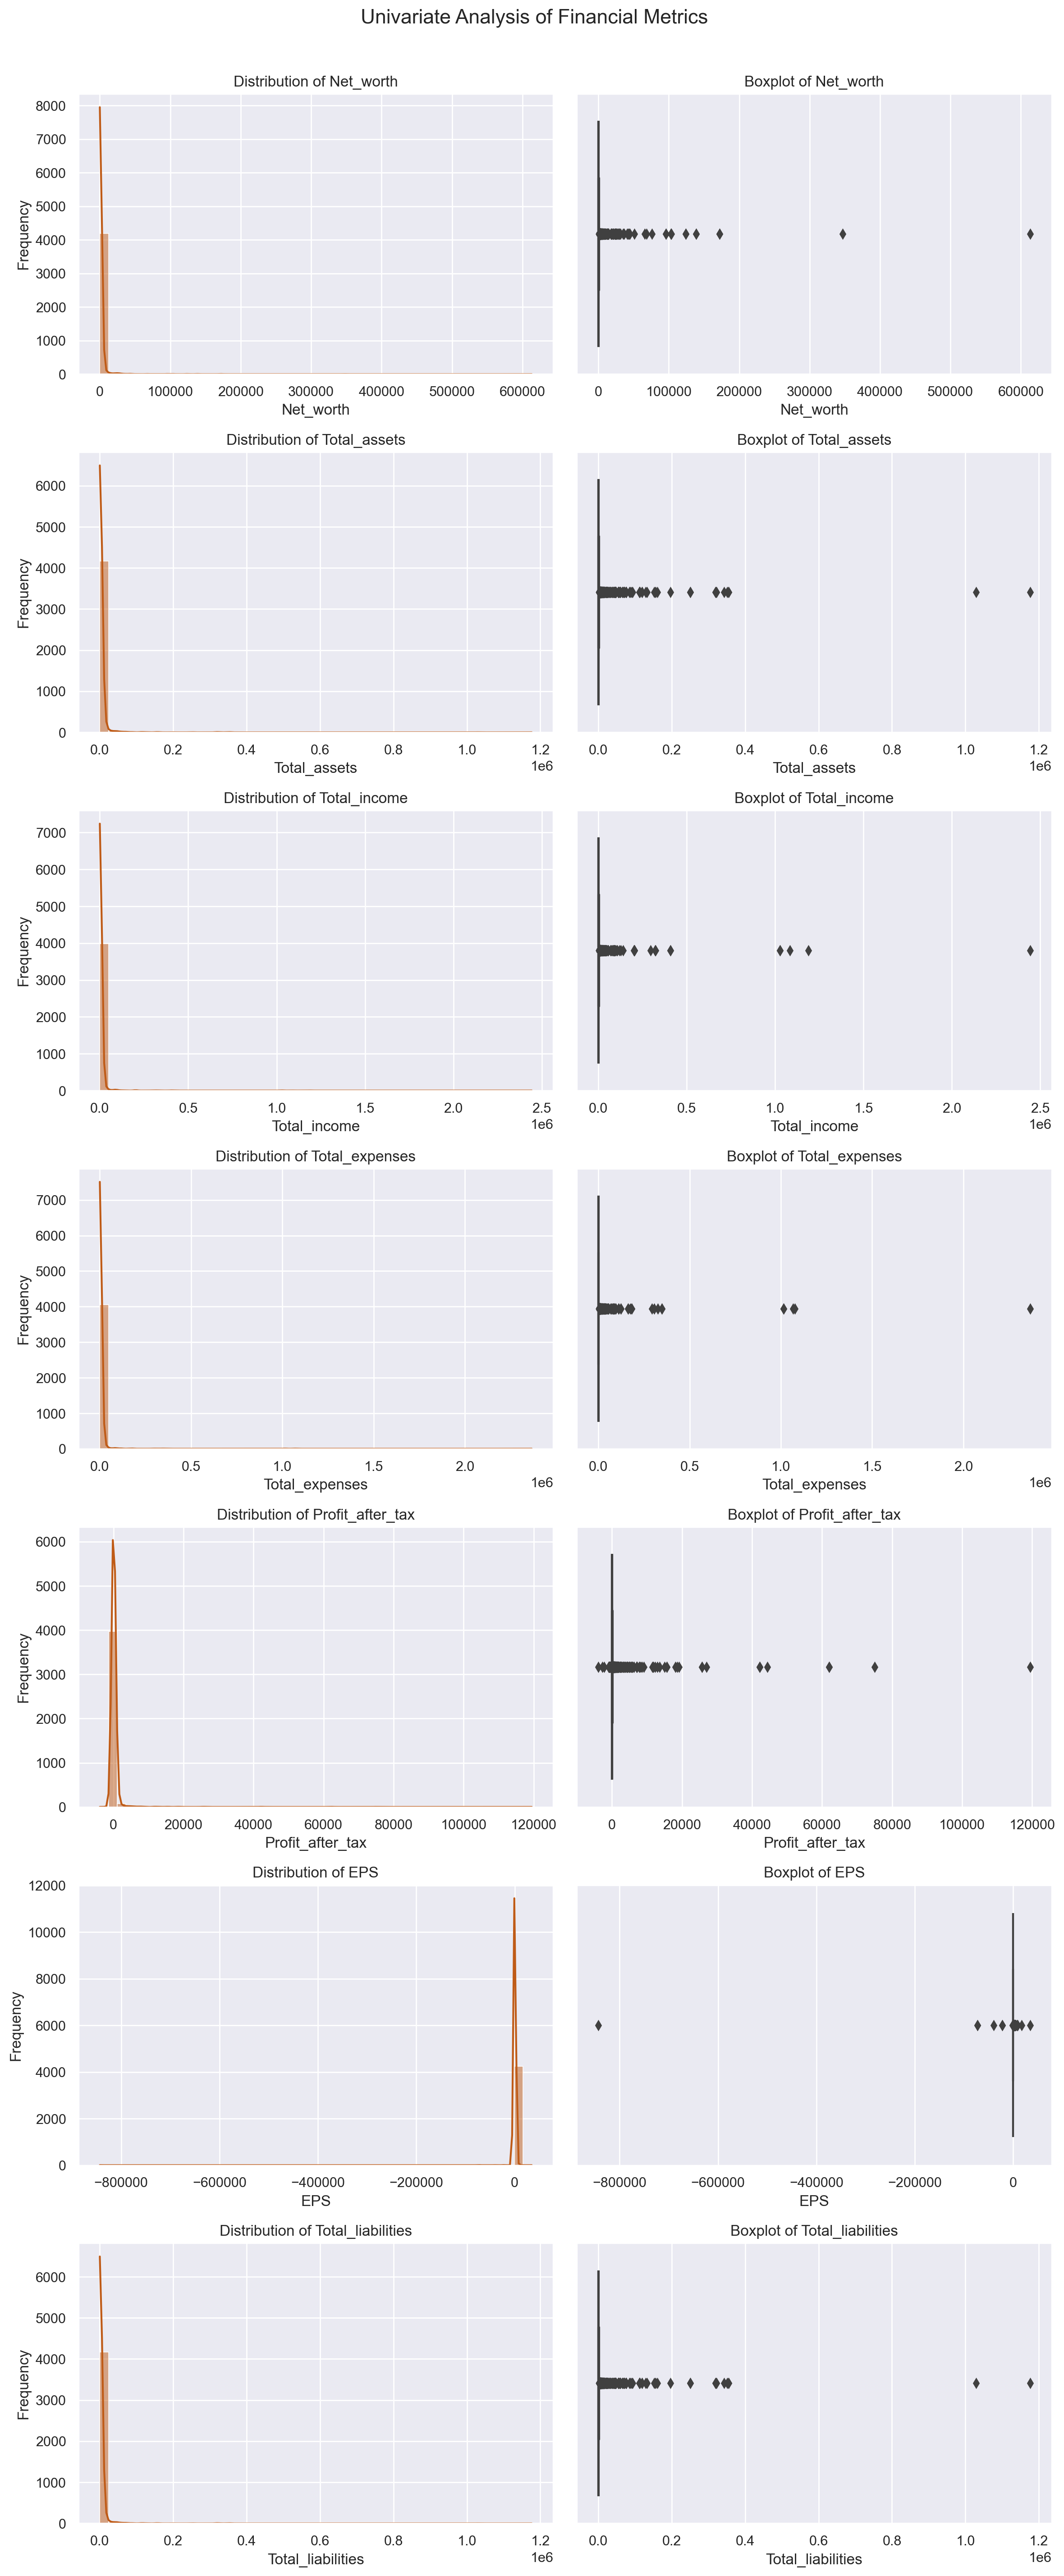

In [188]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# df_1 is the dataframe containing financial metrics
metrics = [
    'Net_worth',
    'Total_assets',
    'Total_income',
    'Total_expenses',
    'Profit_after_tax',
    'EPS',
    'Total_liabilities'
]

# Set the number of rows and columns for the subplots
num_metrics = len(metrics)
fig, axes = plt.subplots(num_metrics, 2, figsize=(12, 4 * num_metrics))

# Create histograms and boxplots for each metric
for i, metric in enumerate(metrics):
    # Histogram
    sns.histplot(df[metric].dropna(), bins=50, ax=axes[i, 0], kde=True)
    axes[i, 0].set_title(f'Distribution of {metric}')
    axes[i, 0].set_xlabel(metric)
    axes[i, 0].set_ylabel('Frequency')

    # Boxplot
    sns.boxplot(x=df[metric].dropna(), ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot of {metric}')
    axes[i, 1].set_xlabel(metric)

# Adjust layout
plt.tight_layout()
plt.suptitle("Univariate Analysis of Financial Metrics", fontsize=16, y=1.02)
plt.show()

<Axes: ylabel='Count'>

Text(0.5, 1.0, 'Net_worth')

Text(0.5, 0, 'Total_assets')

Text(0, 0.5, 'Net_worth')

Text(0.5, 0, 'Total_income')

Text(0, 0.5, 'Net_worth')

Text(0.5, 0, 'Total_expenses')

Text(0, 0.5, 'Net_worth')

Text(0.5, 0, 'Profit_after_tax')

Text(0, 0.5, 'Net_worth')

Text(0.5, 0, 'EPS')

Text(0, 0.5, 'Net_worth')

Text(0.5, 0, 'Total_liabilities')

Text(0, 0.5, 'Net_worth')

Text(0.5, 0, 'Net_worth')

Text(0, 0.5, 'Total_assets')

<Axes: ylabel='Count'>

Text(0.5, 1.0, 'Total_assets')

Text(0.5, 0, 'Total_income')

Text(0, 0.5, 'Total_assets')

Text(0.5, 0, 'Total_expenses')

Text(0, 0.5, 'Total_assets')

Text(0.5, 0, 'Profit_after_tax')

Text(0, 0.5, 'Total_assets')

Text(0.5, 0, 'EPS')

Text(0, 0.5, 'Total_assets')

Text(0.5, 0, 'Total_liabilities')

Text(0, 0.5, 'Total_assets')

Text(0.5, 0, 'Net_worth')

Text(0, 0.5, 'Total_income')

Text(0.5, 0, 'Total_assets')

Text(0, 0.5, 'Total_income')

<Axes: ylabel='Count'>

Text(0.5, 1.0, 'Total_income')

Text(0.5, 0, 'Total_expenses')

Text(0, 0.5, 'Total_income')

Text(0.5, 0, 'Profit_after_tax')

Text(0, 0.5, 'Total_income')

Text(0.5, 0, 'EPS')

Text(0, 0.5, 'Total_income')

Text(0.5, 0, 'Total_liabilities')

Text(0, 0.5, 'Total_income')

Text(0.5, 0, 'Net_worth')

Text(0, 0.5, 'Total_expenses')

Text(0.5, 0, 'Total_assets')

Text(0, 0.5, 'Total_expenses')

Text(0.5, 0, 'Total_income')

Text(0, 0.5, 'Total_expenses')

<Axes: ylabel='Count'>

Text(0.5, 1.0, 'Total_expenses')

Text(0.5, 0, 'Profit_after_tax')

Text(0, 0.5, 'Total_expenses')

Text(0.5, 0, 'EPS')

Text(0, 0.5, 'Total_expenses')

Text(0.5, 0, 'Total_liabilities')

Text(0, 0.5, 'Total_expenses')

Text(0.5, 0, 'Net_worth')

Text(0, 0.5, 'Profit_after_tax')

Text(0.5, 0, 'Total_assets')

Text(0, 0.5, 'Profit_after_tax')

Text(0.5, 0, 'Total_income')

Text(0, 0.5, 'Profit_after_tax')

Text(0.5, 0, 'Total_expenses')

Text(0, 0.5, 'Profit_after_tax')

<Axes: ylabel='Count'>

Text(0.5, 1.0, 'Profit_after_tax')

Text(0.5, 0, 'EPS')

Text(0, 0.5, 'Profit_after_tax')

Text(0.5, 0, 'Total_liabilities')

Text(0, 0.5, 'Profit_after_tax')

Text(0.5, 0, 'Net_worth')

Text(0, 0.5, 'EPS')

Text(0.5, 0, 'Total_assets')

Text(0, 0.5, 'EPS')

Text(0.5, 0, 'Total_income')

Text(0, 0.5, 'EPS')

Text(0.5, 0, 'Total_expenses')

Text(0, 0.5, 'EPS')

Text(0.5, 0, 'Profit_after_tax')

Text(0, 0.5, 'EPS')

<Axes: ylabel='Count'>

Text(0.5, 1.0, 'EPS')

Text(0.5, 0, 'Total_liabilities')

Text(0, 0.5, 'EPS')

Text(0.5, 0, 'Net_worth')

Text(0, 0.5, 'Total_liabilities')

Text(0.5, 0, 'Total_assets')

Text(0, 0.5, 'Total_liabilities')

Text(0.5, 0, 'Total_income')

Text(0, 0.5, 'Total_liabilities')

Text(0.5, 0, 'Total_expenses')

Text(0, 0.5, 'Total_liabilities')

Text(0.5, 0, 'Profit_after_tax')

Text(0, 0.5, 'Total_liabilities')

Text(0.5, 0, 'EPS')

Text(0, 0.5, 'Total_liabilities')

<Axes: ylabel='Count'>

Text(0.5, 1.0, 'Total_liabilities')

Text(0.5, 1.02, 'Scatter Matrix of Financial Metrics')

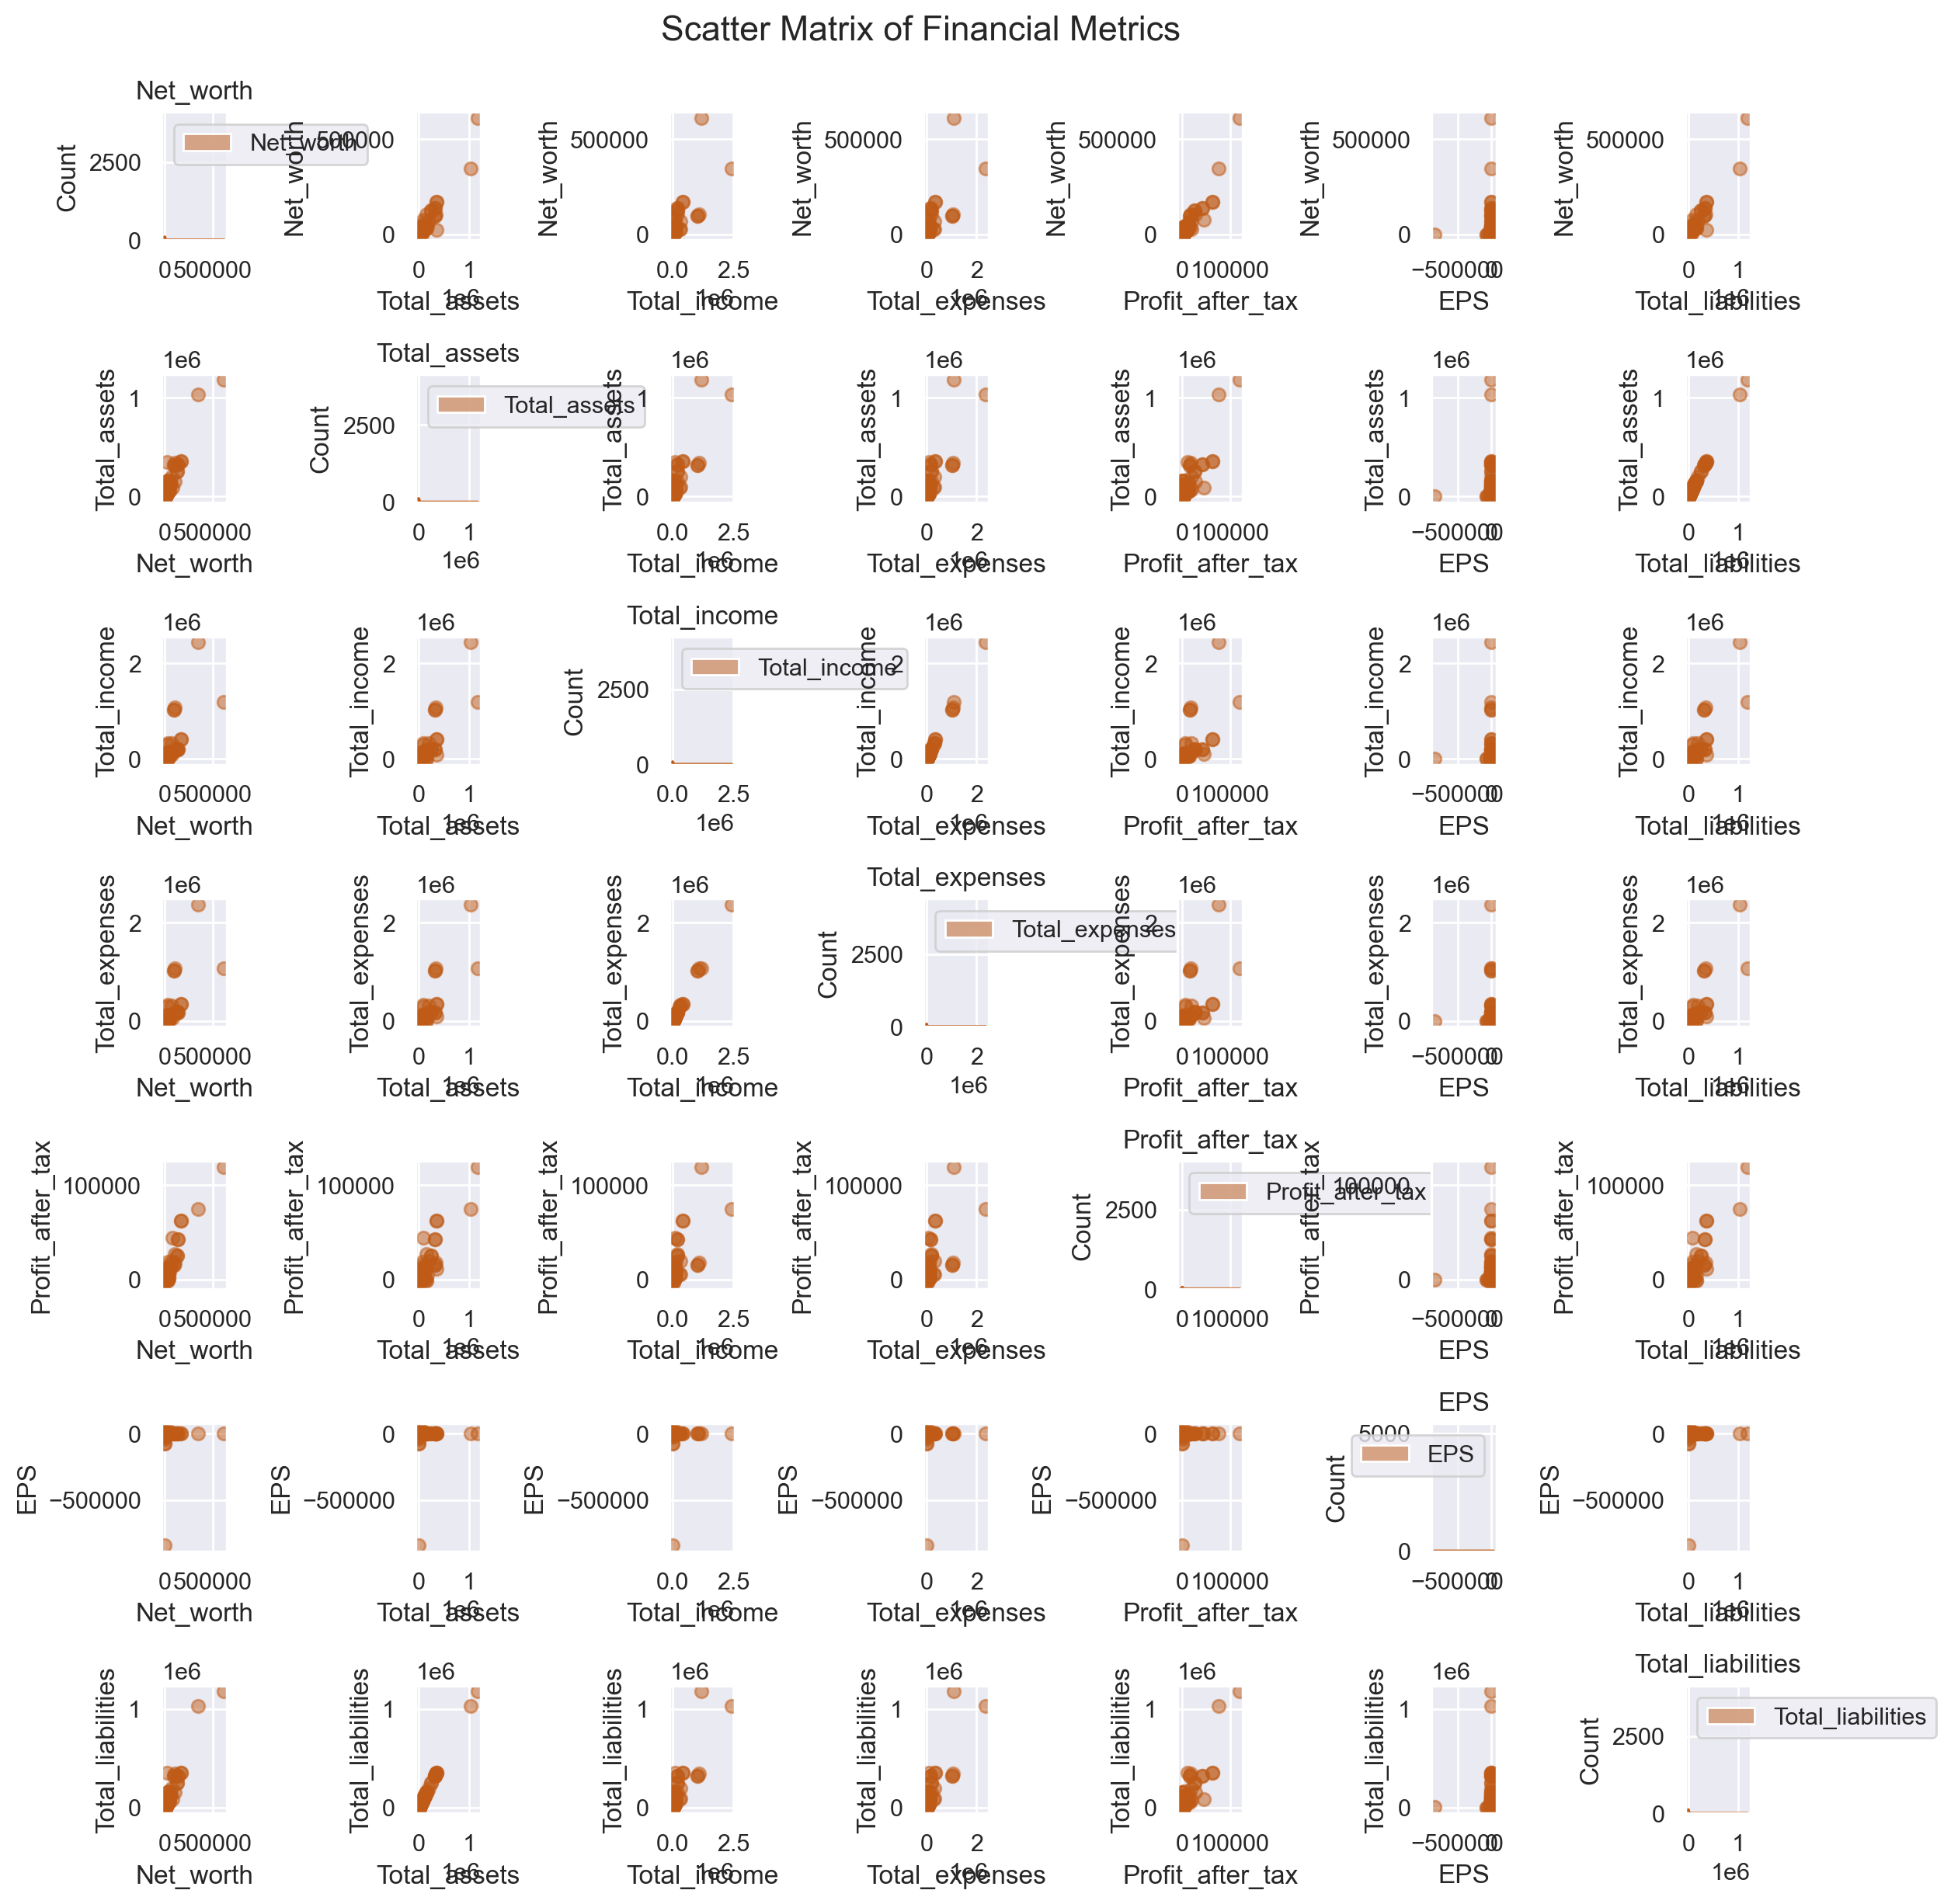

In [189]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# df_1 is the dataframe containing financial metrics
metrics = [
    'Net_worth',
    'Total_assets',
    'Total_income',
    'Total_expenses',
    'Profit_after_tax',
    'EPS',
    'Total_liabilities'
]

# Create the scatter matrix
scatter_matrix_fig, axarr = plt.subplots(len(metrics), len(metrics), figsize=(12, 12))

# Create scatter matrix
for i in range(len(metrics)):
    for j in range(len(metrics)):
        # Drop NaN values from both columns
        valid_data = df[[metrics[i], metrics[j]]].dropna()
        
        if i == j:
            # Diagonal: histogram
            sns.histplot(valid_data[metrics[i]], ax=axarr[i, j], kde=True)
            axarr[i, j].set_title(metrics[i])
        else:
            # Off-diagonal: scatter plot
            axarr[i, j].scatter(valid_data[metrics[j]], valid_data[metrics[i]], alpha=0.5)
            axarr[i, j].set_xlabel(metrics[j])
            axarr[i, j].set_ylabel(metrics[i])

# Adjust layout
plt.tight_layout()
plt.suptitle('Scatter Matrix of Financial Metrics', fontsize=16, y=1.02)
plt.show()

In [59]:
# Filter numerical columns
numerical_columns = df_1.select_dtypes(include=['int64', 'float64']).columns

# Set the number of rows for the subplots
num_columns = len(numerical_columns)
fig, axes = plt.subplots(num_columns, 2, figsize=(12, 4 * num_columns))

# Populate subplots with histograms and boxplots for each numerical column
for i, col in enumerate(numerical_columns):
    # Histogram
    sns.histplot(df[col].dropna(), bins=50, ax=axes[i, 0], kde=True, color='skyblue', edgecolor='black')
    axes[i, 0].set_title(f'Histogram of {col}', fontsize=14)
    axes[i, 0].set_xlabel(col, fontsize=12)
    axes[i, 0].set_ylabel('Frequency', fontsize=12)

    # Boxplot
    sns.boxplot(x=df[col].dropna(), ax=axes[i, 1], color='lightgreen')
    axes[i, 1].set_title(f'Boxplot of {col}', fontsize=14)
    axes[i, 1].set_xlabel(col, fontsize=12)

# Adjust layout
plt.tight_layout()
plt.suptitle("Univariate Analysis of All Numerical Columns", fontsize=16, y=1.02)
plt.show()

<Axes: xlabel='Total_assets', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of Total_assets')

Text(0.5, 0, 'Total_assets')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Total_assets'>

Text(0.5, 1.0, 'Boxplot of Total_assets')

Text(0.5, 0, 'Total_assets')

<Axes: xlabel='Net_worth', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of Net_worth')

Text(0.5, 0, 'Net_worth')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Net_worth'>

Text(0.5, 1.0, 'Boxplot of Net_worth')

Text(0.5, 0, 'Net_worth')

<Axes: xlabel='Total_income', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of Total_income')

Text(0.5, 0, 'Total_income')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Total_income'>

Text(0.5, 1.0, 'Boxplot of Total_income')

Text(0.5, 0, 'Total_income')

<Axes: xlabel='Change_in_stock', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of Change_in_stock')

Text(0.5, 0, 'Change_in_stock')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Change_in_stock'>

Text(0.5, 1.0, 'Boxplot of Change_in_stock')

Text(0.5, 0, 'Change_in_stock')

<Axes: xlabel='Total_expenses', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of Total_expenses')

Text(0.5, 0, 'Total_expenses')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Total_expenses'>

Text(0.5, 1.0, 'Boxplot of Total_expenses')

Text(0.5, 0, 'Total_expenses')

<Axes: xlabel='Profit_after_tax', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of Profit_after_tax')

Text(0.5, 0, 'Profit_after_tax')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Profit_after_tax'>

Text(0.5, 1.0, 'Boxplot of Profit_after_tax')

Text(0.5, 0, 'Profit_after_tax')

<Axes: xlabel='PBDITA', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of PBDITA')

Text(0.5, 0, 'PBDITA')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='PBDITA'>

Text(0.5, 1.0, 'Boxplot of PBDITA')

Text(0.5, 0, 'PBDITA')

<Axes: xlabel='PBT', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of PBT')

Text(0.5, 0, 'PBT')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='PBT'>

Text(0.5, 1.0, 'Boxplot of PBT')

Text(0.5, 0, 'PBT')

<Axes: xlabel='Cash_profit', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of Cash_profit')

Text(0.5, 0, 'Cash_profit')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Cash_profit'>

Text(0.5, 1.0, 'Boxplot of Cash_profit')

Text(0.5, 0, 'Cash_profit')

<Axes: xlabel='PBDITA_as_perc_of_total_income', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of PBDITA_as_perc_of_total_income')

Text(0.5, 0, 'PBDITA_as_perc_of_total_income')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='PBDITA_as_perc_of_total_income'>

Text(0.5, 1.0, 'Boxplot of PBDITA_as_perc_of_total_income')

Text(0.5, 0, 'PBDITA_as_perc_of_total_income')

<Axes: xlabel='PBT_as_perc_of_total_income', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of PBT_as_perc_of_total_income')

Text(0.5, 0, 'PBT_as_perc_of_total_income')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='PBT_as_perc_of_total_income'>

Text(0.5, 1.0, 'Boxplot of PBT_as_perc_of_total_income')

Text(0.5, 0, 'PBT_as_perc_of_total_income')

<Axes: xlabel='PAT_as_perc_of_total_income', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of PAT_as_perc_of_total_income')

Text(0.5, 0, 'PAT_as_perc_of_total_income')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='PAT_as_perc_of_total_income'>

Text(0.5, 1.0, 'Boxplot of PAT_as_perc_of_total_income')

Text(0.5, 0, 'PAT_as_perc_of_total_income')

<Axes: xlabel='Cash_profit_as_perc_of_total_income', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of Cash_profit_as_perc_of_total_income')

Text(0.5, 0, 'Cash_profit_as_perc_of_total_income')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Cash_profit_as_perc_of_total_income'>

Text(0.5, 1.0, 'Boxplot of Cash_profit_as_perc_of_total_income')

Text(0.5, 0, 'Cash_profit_as_perc_of_total_income')

<Axes: xlabel='PAT_as_perc_of_net_worth', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of PAT_as_perc_of_net_worth')

Text(0.5, 0, 'PAT_as_perc_of_net_worth')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='PAT_as_perc_of_net_worth'>

Text(0.5, 1.0, 'Boxplot of PAT_as_perc_of_net_worth')

Text(0.5, 0, 'PAT_as_perc_of_net_worth')

<Axes: xlabel='Sales', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of Sales')

Text(0.5, 0, 'Sales')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Sales'>

Text(0.5, 1.0, 'Boxplot of Sales')

Text(0.5, 0, 'Sales')

<Axes: xlabel='Income_from_fincial_services', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of Income_from_fincial_services')

Text(0.5, 0, 'Income_from_fincial_services')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Income_from_fincial_services'>

Text(0.5, 1.0, 'Boxplot of Income_from_fincial_services')

Text(0.5, 0, 'Income_from_fincial_services')

<Axes: xlabel='Other_income', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of Other_income')

Text(0.5, 0, 'Other_income')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Other_income'>

Text(0.5, 1.0, 'Boxplot of Other_income')

Text(0.5, 0, 'Other_income')

<Axes: xlabel='Total_capital', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of Total_capital')

Text(0.5, 0, 'Total_capital')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Total_capital'>

Text(0.5, 1.0, 'Boxplot of Total_capital')

Text(0.5, 0, 'Total_capital')

<Axes: xlabel='Reserves_and_funds', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of Reserves_and_funds')

Text(0.5, 0, 'Reserves_and_funds')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Reserves_and_funds'>

Text(0.5, 1.0, 'Boxplot of Reserves_and_funds')

Text(0.5, 0, 'Reserves_and_funds')

<Axes: xlabel='Borrowings', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of Borrowings')

Text(0.5, 0, 'Borrowings')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Borrowings'>

Text(0.5, 1.0, 'Boxplot of Borrowings')

Text(0.5, 0, 'Borrowings')

<Axes: xlabel='Deferred_tax_liability', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of Deferred_tax_liability')

Text(0.5, 0, 'Deferred_tax_liability')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Deferred_tax_liability'>

Text(0.5, 1.0, 'Boxplot of Deferred_tax_liability')

Text(0.5, 0, 'Deferred_tax_liability')

<Axes: xlabel='Shareholders_funds', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of Shareholders_funds')

Text(0.5, 0, 'Shareholders_funds')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Shareholders_funds'>

Text(0.5, 1.0, 'Boxplot of Shareholders_funds')

Text(0.5, 0, 'Shareholders_funds')

<Axes: xlabel='Cumulative_retained_profits', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of Cumulative_retained_profits')

Text(0.5, 0, 'Cumulative_retained_profits')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Cumulative_retained_profits'>

Text(0.5, 1.0, 'Boxplot of Cumulative_retained_profits')

Text(0.5, 0, 'Cumulative_retained_profits')

<Axes: xlabel='Capital_employed', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of Capital_employed')

Text(0.5, 0, 'Capital_employed')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Capital_employed'>

Text(0.5, 1.0, 'Boxplot of Capital_employed')

Text(0.5, 0, 'Capital_employed')

<Axes: xlabel='TOL_to_TNW', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of TOL_to_TNW')

Text(0.5, 0, 'TOL_to_TNW')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='TOL_to_TNW'>

Text(0.5, 1.0, 'Boxplot of TOL_to_TNW')

Text(0.5, 0, 'TOL_to_TNW')

<Axes: xlabel='Total_term_liabilities__to__tangible_net_worth', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of Total_term_liabilities__to__tangible_net_worth')

Text(0.5, 0, 'Total_term_liabilities__to__tangible_net_worth')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Total_term_liabilities__to__tangible_net_worth'>

Text(0.5, 1.0, 'Boxplot of Total_term_liabilities__to__tangible_net_worth')

Text(0.5, 0, 'Total_term_liabilities__to__tangible_net_worth')

<Axes: xlabel='Contingent_liabilities__to__Net_worth_perc', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of Contingent_liabilities__to__Net_worth_perc')

Text(0.5, 0, 'Contingent_liabilities__to__Net_worth_perc')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Contingent_liabilities__to__Net_worth_perc'>

Text(0.5, 1.0, 'Boxplot of Contingent_liabilities__to__Net_worth_perc')

Text(0.5, 0, 'Contingent_liabilities__to__Net_worth_perc')

<Axes: xlabel='Contingent_liabilities', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of Contingent_liabilities')

Text(0.5, 0, 'Contingent_liabilities')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Contingent_liabilities'>

Text(0.5, 1.0, 'Boxplot of Contingent_liabilities')

Text(0.5, 0, 'Contingent_liabilities')

<Axes: xlabel='Net_fixed_assets', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of Net_fixed_assets')

Text(0.5, 0, 'Net_fixed_assets')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Net_fixed_assets'>

Text(0.5, 1.0, 'Boxplot of Net_fixed_assets')

Text(0.5, 0, 'Net_fixed_assets')

<Axes: xlabel='Investments', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of Investments')

Text(0.5, 0, 'Investments')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Investments'>

Text(0.5, 1.0, 'Boxplot of Investments')

Text(0.5, 0, 'Investments')

<Axes: xlabel='Current_assets', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of Current_assets')

Text(0.5, 0, 'Current_assets')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Current_assets'>

Text(0.5, 1.0, 'Boxplot of Current_assets')

Text(0.5, 0, 'Current_assets')

<Axes: xlabel='Net_working_capital', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of Net_working_capital')

Text(0.5, 0, 'Net_working_capital')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Net_working_capital'>

Text(0.5, 1.0, 'Boxplot of Net_working_capital')

Text(0.5, 0, 'Net_working_capital')

<Axes: xlabel='Quick_ratio_times', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of Quick_ratio_times')

Text(0.5, 0, 'Quick_ratio_times')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Quick_ratio_times'>

Text(0.5, 1.0, 'Boxplot of Quick_ratio_times')

Text(0.5, 0, 'Quick_ratio_times')

<Axes: xlabel='Current_ratio_times', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of Current_ratio_times')

Text(0.5, 0, 'Current_ratio_times')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Current_ratio_times'>

Text(0.5, 1.0, 'Boxplot of Current_ratio_times')

Text(0.5, 0, 'Current_ratio_times')

<Axes: xlabel='Debt_to_equity_ratio_times', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of Debt_to_equity_ratio_times')

Text(0.5, 0, 'Debt_to_equity_ratio_times')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Debt_to_equity_ratio_times'>

Text(0.5, 1.0, 'Boxplot of Debt_to_equity_ratio_times')

Text(0.5, 0, 'Debt_to_equity_ratio_times')

<Axes: xlabel='Cash_to_current_liabilities_times', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of Cash_to_current_liabilities_times')

Text(0.5, 0, 'Cash_to_current_liabilities_times')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Cash_to_current_liabilities_times'>

Text(0.5, 1.0, 'Boxplot of Cash_to_current_liabilities_times')

Text(0.5, 0, 'Cash_to_current_liabilities_times')

<Axes: xlabel='Cash_to_average_cost_of_sales_per_day', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of Cash_to_average_cost_of_sales_per_day')

Text(0.5, 0, 'Cash_to_average_cost_of_sales_per_day')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Cash_to_average_cost_of_sales_per_day'>

Text(0.5, 1.0, 'Boxplot of Cash_to_average_cost_of_sales_per_day')

Text(0.5, 0, 'Cash_to_average_cost_of_sales_per_day')

<Axes: xlabel='Creditors_turnover', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of Creditors_turnover')

Text(0.5, 0, 'Creditors_turnover')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Creditors_turnover'>

Text(0.5, 1.0, 'Boxplot of Creditors_turnover')

Text(0.5, 0, 'Creditors_turnover')

<Axes: xlabel='Debtors_turnover', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of Debtors_turnover')

Text(0.5, 0, 'Debtors_turnover')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Debtors_turnover'>

Text(0.5, 1.0, 'Boxplot of Debtors_turnover')

Text(0.5, 0, 'Debtors_turnover')

<Axes: xlabel='Finished_goods_turnover', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of Finished_goods_turnover')

Text(0.5, 0, 'Finished_goods_turnover')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Finished_goods_turnover'>

Text(0.5, 1.0, 'Boxplot of Finished_goods_turnover')

Text(0.5, 0, 'Finished_goods_turnover')

<Axes: xlabel='WIP_turnover', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of WIP_turnover')

Text(0.5, 0, 'WIP_turnover')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='WIP_turnover'>

Text(0.5, 1.0, 'Boxplot of WIP_turnover')

Text(0.5, 0, 'WIP_turnover')

<Axes: xlabel='Raw_material_turnover', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of Raw_material_turnover')

Text(0.5, 0, 'Raw_material_turnover')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Raw_material_turnover'>

Text(0.5, 1.0, 'Boxplot of Raw_material_turnover')

Text(0.5, 0, 'Raw_material_turnover')

<Axes: xlabel='Shares_outstanding', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of Shares_outstanding')

Text(0.5, 0, 'Shares_outstanding')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Shares_outstanding'>

Text(0.5, 1.0, 'Boxplot of Shares_outstanding')

Text(0.5, 0, 'Shares_outstanding')

<Axes: xlabel='Equity_face_value', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of Equity_face_value')

Text(0.5, 0, 'Equity_face_value')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Equity_face_value'>

Text(0.5, 1.0, 'Boxplot of Equity_face_value')

Text(0.5, 0, 'Equity_face_value')

<Axes: xlabel='EPS', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of EPS')

Text(0.5, 0, 'EPS')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='EPS'>

Text(0.5, 1.0, 'Boxplot of EPS')

Text(0.5, 0, 'EPS')

<Axes: xlabel='Adjusted_EPS', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of Adjusted_EPS')

Text(0.5, 0, 'Adjusted_EPS')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Adjusted_EPS'>

Text(0.5, 1.0, 'Boxplot of Adjusted_EPS')

Text(0.5, 0, 'Adjusted_EPS')

<Axes: xlabel='Total_liabilities', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of Total_liabilities')

Text(0.5, 0, 'Total_liabilities')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Total_liabilities'>

Text(0.5, 1.0, 'Boxplot of Total_liabilities')

Text(0.5, 0, 'Total_liabilities')

<Axes: xlabel='PE_on_BSE', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of PE_on_BSE')

Text(0.5, 0, 'PE_on_BSE')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='PE_on_BSE'>

Text(0.5, 1.0, 'Boxplot of PE_on_BSE')

Text(0.5, 0, 'PE_on_BSE')

Text(0.5, 1.02, 'Univariate Analysis of All Numerical Columns')

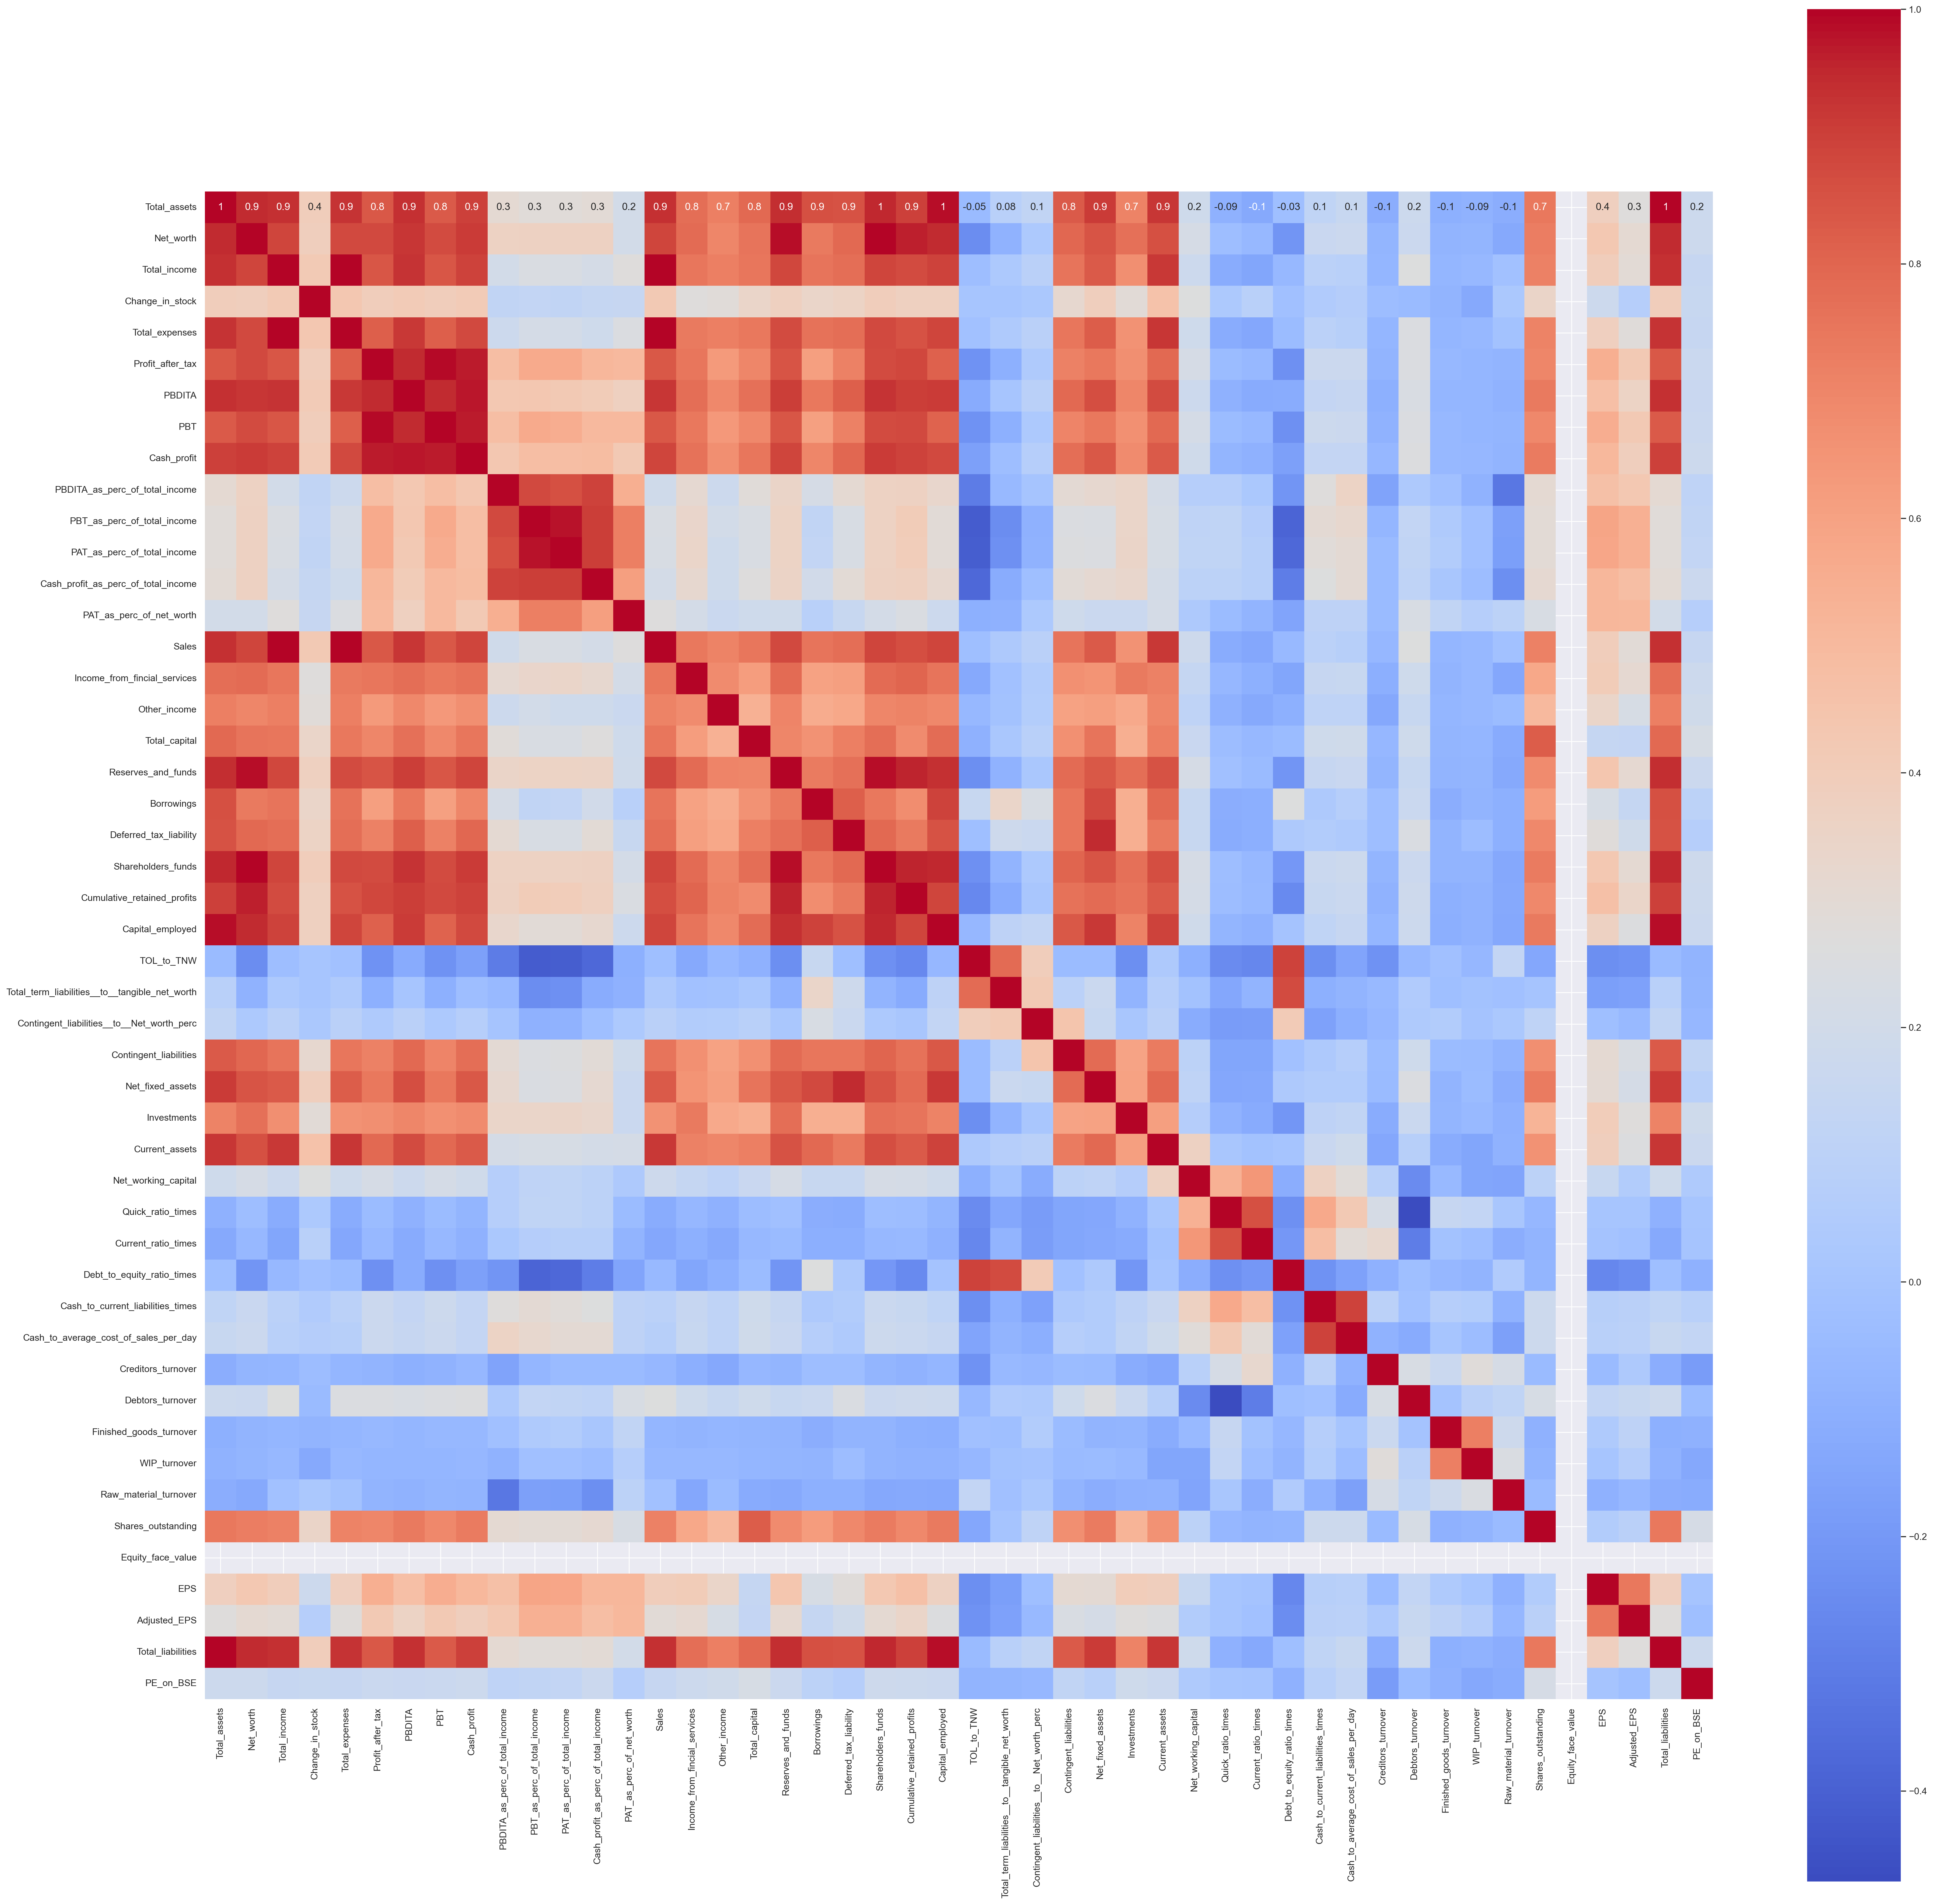

In [82]:
#calculate column correlations and make a seaborn heatmap - Before standardisation

plt.figure(figsize=(40,40))
p=sns.heatmap(df_x.corr(), annot=True,cmap='coolwarm',square=True, fmt='.1g')
plt.savefig('heatmap_dfx_55vars.jpg', bbox_inches='tight');

### Data Pre-processing

In [62]:
missing_values = df_1.isnull().sum()
print("\nMissing values in each column:\n", missing_values)


Missing values in each column:
 Total_assets                                         0
Net_worth                                            0
Total_income                                       229
Change_in_stock                                    548
Total_expenses                                     163
Profit_after_tax                                   152
PBDITA                                             152
PBT                                                152
Cash_profit                                        152
PBDITA_as_perc_of_total_income                      79
PBT_as_perc_of_total_income                         79
PAT_as_perc_of_total_income                         79
Cash_profit_as_perc_of_total_income                 79
PAT_as_perc_of_net_worth                             0
Sales                                              303
Income_from_fincial_services                      1109
Other_income                                      1554
Total_capital                   

In [64]:
df_2 = df_1.dropna()
print("\nDataframe shape after dropping rows with missing values:", df_2.shape)


Dataframe shape after dropping rows with missing values: (655, 48)


In [66]:
# Verify no missing values remain
print("\nMissing values after handling:\n", df_2.isnull().sum())


Missing values after handling:
 Total_assets                                      0
Net_worth                                         0
Total_income                                      0
Change_in_stock                                   0
Total_expenses                                    0
Profit_after_tax                                  0
PBDITA                                            0
PBT                                               0
Cash_profit                                       0
PBDITA_as_perc_of_total_income                    0
PBT_as_perc_of_total_income                       0
PAT_as_perc_of_total_income                       0
Cash_profit_as_perc_of_total_income               0
PAT_as_perc_of_net_worth                          0
Sales                                             0
Income_from_fincial_services                      0
Other_income                                      0
Total_capital                                     0
Reserves_and_funds             

In [80]:
# Define the function to remove outliers
def remove_outlier(col):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1, Q3 = np.percentile(col, [25, 75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

# Create a copy of the DataFrame to avoid modifying the original
df_x = df_2.copy()

# Iterate through each numerical column to detect and treat outliers
for column in df_x.columns:
    lr, ur = remove_outlier(df_x[column])
    # Cap the outliers
    df_x[column] = np.where(df_x[column] > ur, ur, df_x[column])
    df_x[column] = np.where(df_x[column] < lr, lr, df_x[column])

# The final DataFrame with treated outliers is now df_x
# Optional: Display the first few rows of the final DataFrame
print(df_x.head())

    Total_assets  Net_worth  Total_income  Change_in_stock  Total_expenses  Profit_after_tax   PBDITA       PBT  Cash_profit  PBDITA_as_perc_of_total_income  PBT_as_perc_of_total_income  PAT_as_perc_of_total_income  Cash_profit_as_perc_of_total_income  PAT_as_perc_of_net_worth    Sales  Income_from_fincial_services  Other_income  Total_capital  Reserves_and_funds  Borrowings  Deferred_tax_liability  Shareholders_funds  Cumulative_retained_profits  Capital_employed  TOL_to_TNW  Total_term_liabilities__to__tangible_net_worth  Contingent_liabilities__to__Net_worth_perc  Contingent_liabilities  Net_fixed_assets  Investments  Current_assets  Net_working_capital  Quick_ratio_times  Current_ratio_times  Debt_to_equity_ratio_times  Cash_to_current_liabilities_times  Cash_to_average_cost_of_sales_per_day  Creditors_turnover  Debtors_turnover  Finished_goods_turnover  WIP_turnover  Raw_material_turnover  Shares_outstanding  Equity_face_value    EPS  Adjusted_EPS  Total_liabilities  PE_on_BSE
11 

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame
# Encode categorical data if any
categorical_columns = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# For demonstration, let's print the first few rows
print("Encoded DataFrame (first 5 rows):")
print(df_encoded.head())

# Example: Assume 'Profit after tax' is the target variable
target_column = 'Profit_after_tax'
X = df_encoded.drop(target_column, axis=1)
y = df_encoded[target_column]

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data
X_test_scaled = scaler.transform(X_test)

# For demonstration, let's print the first few rows of the scaled data
print("Scaled Training Data (first 5 rows):")
print(X_train_scaled[:5])

print("Scaled Testing Data (first 5 rows):")
print(X_test_scaled[:5])

Encoded DataFrame (first 5 rows):
   Networth_Next_Year  Total_assets  Net_worth  Total_income  Change_in_stock  Total_expenses  Profit_after_tax  PBDITA    PBT  Cash_profit  PBDITA_as_perc_of_total_income  PBT_as_perc_of_total_income  PAT_as_perc_of_total_income  Cash_profit_as_perc_of_total_income  PAT_as_perc_of_net_worth   Sales  Income_from_fincial_services  Other_income  Total_capital  Reserves_and_funds  Borrowings  Deferred_tax_liability  Shareholders_funds  Cumulative_retained_profits  Capital_employed  TOL_to_TNW  Total_term_liabilities__to__tangible_net_worth  Contingent_liabilities__to__Net_worth_perc  Contingent_liabilities  Net_fixed_assets  Investments  Current_assets  Net_working_capital  Quick_ratio_times  Current_ratio_times  Debt_to_equity_ratio_times  Cash_to_current_liabilities_times  Cash_to_average_cost_of_sales_per_day  Creditors_turnover  Debtors_turnover  Finished_goods_turnover  WIP_turnover  Raw_material_turnover  Shares_outstanding  Equity_face_value    EPS

In [92]:
# Create the target variable 'default'
df['default'] = df['Networth_Next_Year'].apply(lambda x: 1 if x < 0 else 0)

# For demonstration, let's print the first few rows
print("DataFrame with 'default' target variable (first 5 rows):")
print(df.head())

# Drop 'Networth Next Year' from features as it's used to create the target variable
X = df.drop(['Networth_Next_Year', 'default'], axis=1)
y = df['default']

# Encode categorical data if any
categorical_columns = X.select_dtypes(include=['object']).columns
X_encoded = pd.get_dummies(X, columns=categorical_columns)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data
X_test_scaled = scaler.transform(X_test)

# For demonstration, let's print the first few rows of the scaled data
print("Scaled Training Data (first 5 rows):")
print(X_train_scaled[:5])

print("Scaled Testing Data (first 5 rows):")
print(X_test_scaled[:5])

DataFrame with 'default' target variable (first 5 rows):
   Networth_Next_Year  Total_assets  Net_worth  Total_income  Change_in_stock  Total_expenses  Profit_after_tax  PBDITA    PBT  Cash_profit  PBDITA_as_perc_of_total_income  PBT_as_perc_of_total_income  PAT_as_perc_of_total_income  Cash_profit_as_perc_of_total_income  PAT_as_perc_of_net_worth   Sales  Income_from_fincial_services  Other_income  Total_capital  Reserves_and_funds  Borrowings  Deferred_tax_liability  Shareholders_funds  Cumulative_retained_profits  Capital_employed  TOL_to_TNW  Total_term_liabilities__to__tangible_net_worth  Contingent_liabilities__to__Net_worth_perc  Contingent_liabilities  Net_fixed_assets  Investments  Current_assets  Net_working_capital  Quick_ratio_times  Current_ratio_times  Debt_to_equity_ratio_times  Cash_to_current_liabilities_times  Cash_to_average_cost_of_sales_per_day  Creditors_turnover  Debtors_turnover  Finished_goods_turnover  WIP_turnover  Raw_material_turnover  Shares_outstanding  E

## Model Building

Model Building (Logistic Regression, Random Forest) - Model performance check across different metrics

In [97]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Assume df is the preprocessed DataFrame
# Create the target variable
df['default'] = (df['Networth_Next_Year'] < 0).astype(int)

# Drop the target variable from the features
X = df.drop(['default', 'Networth_Next_Year'], axis=1)
y = df['default']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [101]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Assume df is the preprocessed DataFrame
# Create the target variable
df['default'] = (df['Networth_Next_Year'] < 0).astype(int)

# Drop the target variable from the features
X = df.drop(['default', 'Networth_Next_Year'], axis=1)
y = df['default']

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the logistic regression model
logistic_model = LogisticRegression(random_state=42)

# Train the model
logistic_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_logistic = logistic_model.predict(X_test_scaled)
y_pred_logistic_prob = logistic_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic)
recall_logistic = recall_score(y_test, y_pred_logistic)
f1_logistic = f1_score(y_test, y_pred_logistic)
roc_auc_logistic = roc_auc_score(y_test, y_pred_logistic_prob)
cm_logistic = confusion_matrix(y_test, y_pred_logistic)

# Print the evaluation metrics
print("Logistic Regression Model")
print(f'Accuracy: {accuracy_logistic:.4f}')
print(f'Precision: {precision_logistic:.4f}')
print(f'Recall: {recall_logistic:.4f}')
print(f'F1 Score: {f1_logistic:.4f}')
print(f'ROC AUC Score: {roc_auc_logistic:.4f}')
print('Confusion Matrix:')
print(cm_logistic)
print('Classification Report:')
print(classification_report(y_test, y_pred_logistic))

LogisticRegression(random_state=42)

Logistic Regression Model
Accuracy: 0.9460
Precision: 0.6000
Recall: 0.1837
F1 Score: 0.2812
ROC AUC Score: 0.8605
Confusion Matrix:
[[797   6]
 [ 40   9]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       803
           1       0.60      0.18      0.28        49

    accuracy                           0.95       852
   macro avg       0.78      0.59      0.63       852
weighted avg       0.93      0.95      0.93       852



In [103]:
# Initialize the random forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_rf_prob = rf_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf_prob)
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Print the evaluation metrics
print("Random Forest Model")
print(f'Accuracy: {accuracy_rf:.4f}')
print(f'Precision: {precision_rf:.4f}')
print(f'Recall: {recall_rf:.4f}')
print(f'F1 Score: {f1_rf:.4f}')
print(f'ROC AUC Score: {roc_auc_rf:.4f}')
print('Confusion Matrix:')
print(cm_rf)
print('Classification Report:')
print(classification_report(y_test, y_pred_rf))

RandomForestClassifier(random_state=42)

Random Forest Model
Accuracy: 0.9484
Precision: 0.6000
Recall: 0.3061
F1 Score: 0.4054
ROC AUC Score: 0.9512
Confusion Matrix:
[[793  10]
 [ 34  15]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       803
           1       0.60      0.31      0.41        49

    accuracy                           0.95       852
   macro avg       0.78      0.65      0.69       852
weighted avg       0.94      0.95      0.94       852



In [105]:
import pandas as pd

# Create a DataFrame to summarize the metrics
metrics_summary = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC Score'],
    'Logistic Regression': [accuracy_logistic, precision_logistic, recall_logistic, f1_logistic, roc_auc_logistic],
    'Random Forest': [accuracy_rf, precision_rf, recall_rf, f1_rf, roc_auc_rf]
})

print(metrics_summary)

          Metric  Logistic Regression  Random Forest
0       Accuracy             0.946009       0.948357
1      Precision             0.600000       0.600000
2         Recall             0.183673       0.306122
3       F1 Score             0.281250       0.405405
4  ROC AUC Score             0.860510       0.951216


### Model Performance Improvement

Dealing with multicollinearity using VIF - Identify optimal threshold for Logistic Regression using ROC curve - Hyperparameter Tuning for Random Forest - Model performance check across different metrics

In [111]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# X is the features DataFrame (after encoding and imputing missing values)
# Calculate VIF for each feature
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    return vif_data

# Calculate VIF for the feature set
vif_df = calculate_vif(pd.DataFrame(X_imputed, columns=X.columns))

print("VIF before removing features:")
print(vif_df)

VIF before removing features:
                                           feature           VIF
0                                     Total_assets           inf
1                                        Net_worth  4.873720e+03
2                                     Total_income  1.414006e+04
3                                  Change_in_stock  3.996870e+00
4                                   Total_expenses  6.893972e+03
5                                 Profit_after_tax  1.423727e+03
6                                           PBDITA  1.162493e+03
7                                              PBT  1.641155e+03
8                                      Cash_profit  1.129284e+03
9                   PBDITA_as_perc_of_total_income  2.195248e+00
10                     PBT_as_perc_of_total_income  1.632080e+02
11                     PAT_as_perc_of_total_income  1.306199e+02
12             Cash_profit_as_perc_of_total_income  3.387459e+01
13                        PAT_as_perc_of_net_worth  1.071655

In [119]:
# Sort the VIF DataFrame by VIF scores in descending order
vif_df = vif_df.sort_values(by="VIF", ascending=False)

print("VIF before removing features (sorted by VIF scores):")
print(vif_df)

VIF before removing features (sorted by VIF scores):
                                           feature           VIF
0                                     Total_assets           inf
46                               Total_liabilities           inf
44                                             EPS  1.677700e+06
45                                    Adjusted_EPS  1.677699e+06
2                                     Total_income  1.414006e+04
21                              Shareholders_funds  8.617055e+03
14                                           Sales  7.730453e+03
4                                   Total_expenses  6.893972e+03
1                                        Net_worth  4.873720e+03
23                                Capital_employed  4.089504e+03
7                                              PBT  1.641155e+03
5                                 Profit_after_tax  1.423727e+03
18                              Reserves_and_funds  1.183127e+03
6                                    

In [127]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to calculate VIF
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    return vif_data

# Function to iteratively remove features with high VIF
def remove_high_vif_features(X, threshold=5.0):
    while True:
        vif_df = calculate_vif(X)
        max_vif = vif_df["VIF"].max()
        if max_vif > threshold:
            feature_to_remove = vif_df.sort_values("VIF", ascending=False)["feature"].iloc[0]
            X = X.drop(columns=[feature_to_remove])
            print(f"Removed feature '{feature_to_remove}' with VIF: {max_vif:.2f}")
        else:
            break
    return X

# Assuming X_imputed is your DataFrame with features
X_imputed = pd.DataFrame(X_imputed)  # Ensure X_imputed is a DataFrame

# Check for NaN and infinite values
if X_imputed.isnull().values.any():
    print("Warning: NaN values found in the dataset. Filling NaN values with the mean.")
    X_imputed.fillna(X_imputed.mean(), inplace=True)

if np.isinf(X_imputed.values).any():
    print("Warning: Infinite values found in the dataset. Replacing infinite values with large finite numbers.")
    X_imputed.replace([np.inf, -np.inf], np.nan, inplace=True)
    X_imputed.fillna(X_imputed.mean(), inplace=True)  # Fill NaN after replacing inf

# Remove features with high VIF
X_reduced = remove_high_vif_features(X_imputed)

# Calculate VIF after removal
vif_df_reduced = calculate_vif(X_reduced)

print("VIF after removing features:")
print(vif_df_reduced)

Removed feature '0' with VIF: inf
Removed feature '44' with VIF: 1677700.07
Removed feature '2' with VIF: 14140.05
Removed feature '21' with VIF: 8615.89
Removed feature '14' with VIF: 4028.63
Removed feature '23' with VIF: 3097.13
Removed feature '7' with VIF: 1549.85
Removed feature '8' with VIF: 1084.51
Removed feature '1' with VIF: 948.04
Removed feature '46' with VIF: 776.93
Removed feature '6' with VIF: 500.32
Removed feature '18' with VIF: 196.28
Removed feature '10' with VIF: 162.92
Removed feature '22' with VIF: 77.27
Removed feature '28' with VIF: 58.58
Removed feature '32' with VIF: 55.15
Removed feature '20' with VIF: 30.25
Removed feature '12' with VIF: 26.37
Removed feature '5' with VIF: 15.07
Removed feature '24' with VIF: 13.70
Removed feature '4' with VIF: 11.54
Removed feature '30' with VIF: 10.16
Removed feature '19' with VIF: 7.17
VIF after removing features:
    feature       VIF
0         3  1.313650
1         9  2.145842
2        11  2.219910
3        13  1.04476

In [129]:
# Split the data into training and testing sets again
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Standardize the features again
scaler = StandardScaler()
X_train_reduced_scaled = scaler.fit_transform(X_train_reduced)
X_test_reduced_scaled = scaler.transform(X_test_reduced)

# Retrain and evaluate logistic regression
logistic_model.fit(X_train_reduced_scaled, y_train)
y_pred_logistic = logistic_model.predict(X_test_reduced_scaled)
y_pred_logistic_prob = logistic_model.predict_proba(X_test_reduced_scaled)[:, 1]

accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic)
recall_logistic = recall_score(y_test, y_pred_logistic)
f1_logistic = f1_score(y_test, y_pred_logistic)
roc_auc_logistic = roc_auc_score(y_test, y_pred_logistic_prob)
cm_logistic = confusion_matrix(y_test, y_pred_logistic)
classification_report_logistic = classification_report(y_test, y_pred_logistic)

# Retrain and evaluate random forest
rf_model.fit(X_train_reduced_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_reduced_scaled)
y_pred_rf_prob = rf_model.predict_proba(X_test_reduced_scaled)[:, 1]

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf_prob)
cm_rf = confusion_matrix(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf)

# Print the evaluation metrics for logistic regression
print("Logistic Regression Model After VIF Reduction")
print(f'Accuracy: {accuracy_logistic:.4f}')
print(f'Precision: {precision_logistic:.4f}')
print(f'Recall: {recall_logistic:.4f}')
print(f'F1 Score: {f1_logistic:.4f}')
print(f'ROC AUC Score: {roc_auc_logistic:.4f}')
print('Confusion Matrix:')
print(cm_logistic)
print('Classification Report:')
print(classification_report_logistic)

# Print the evaluation metrics for random forest
print("Random Forest Model After VIF Reduction")
print(f'Accuracy: {accuracy_rf:.4f}')
print(f'Precision: {precision_rf:.4f}')
print(f'Recall: {recall_rf:.4f}')
print(f'F1 Score: {f1_rf:.4f}')
print(f'ROC AUC Score: {roc_auc_rf:.4f}')
print('Confusion Matrix:')
print(cm_rf)
print('Classification Report:')
print(classification_report_rf)
# Create a summary of metrics
metrics_summary = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC Score'],
    'Logistic Regression': [accuracy_logistic, precision_logistic, recall_logistic, f1_logistic, roc_auc_logistic],
    'Random Forest': [accuracy_rf, precision_rf, recall_rf, f1_rf, roc_auc_rf]
})

print(metrics_summary)

LogisticRegression(random_state=42)

RandomForestClassifier(random_state=42)

Logistic Regression Model After VIF Reduction
Accuracy: 0.9484
Precision: 0.6471
Recall: 0.2245
F1 Score: 0.3333
ROC AUC Score: 0.8624
Confusion Matrix:
[[797   6]
 [ 38  11]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       803
           1       0.65      0.22      0.33        49

    accuracy                           0.95       852
   macro avg       0.80      0.61      0.65       852
weighted avg       0.94      0.95      0.94       852

Random Forest Model After VIF Reduction
Accuracy: 0.9448
Precision: 0.5417
Recall: 0.2653
F1 Score: 0.3562
ROC AUC Score: 0.9122
Confusion Matrix:
[[792  11]
 [ 36  13]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       803
           1       0.54      0.27      0.36        49

    accuracy                           0.94       852
   macro avg       0.75      0.63      0.66       852
weighted 

<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC Curve')

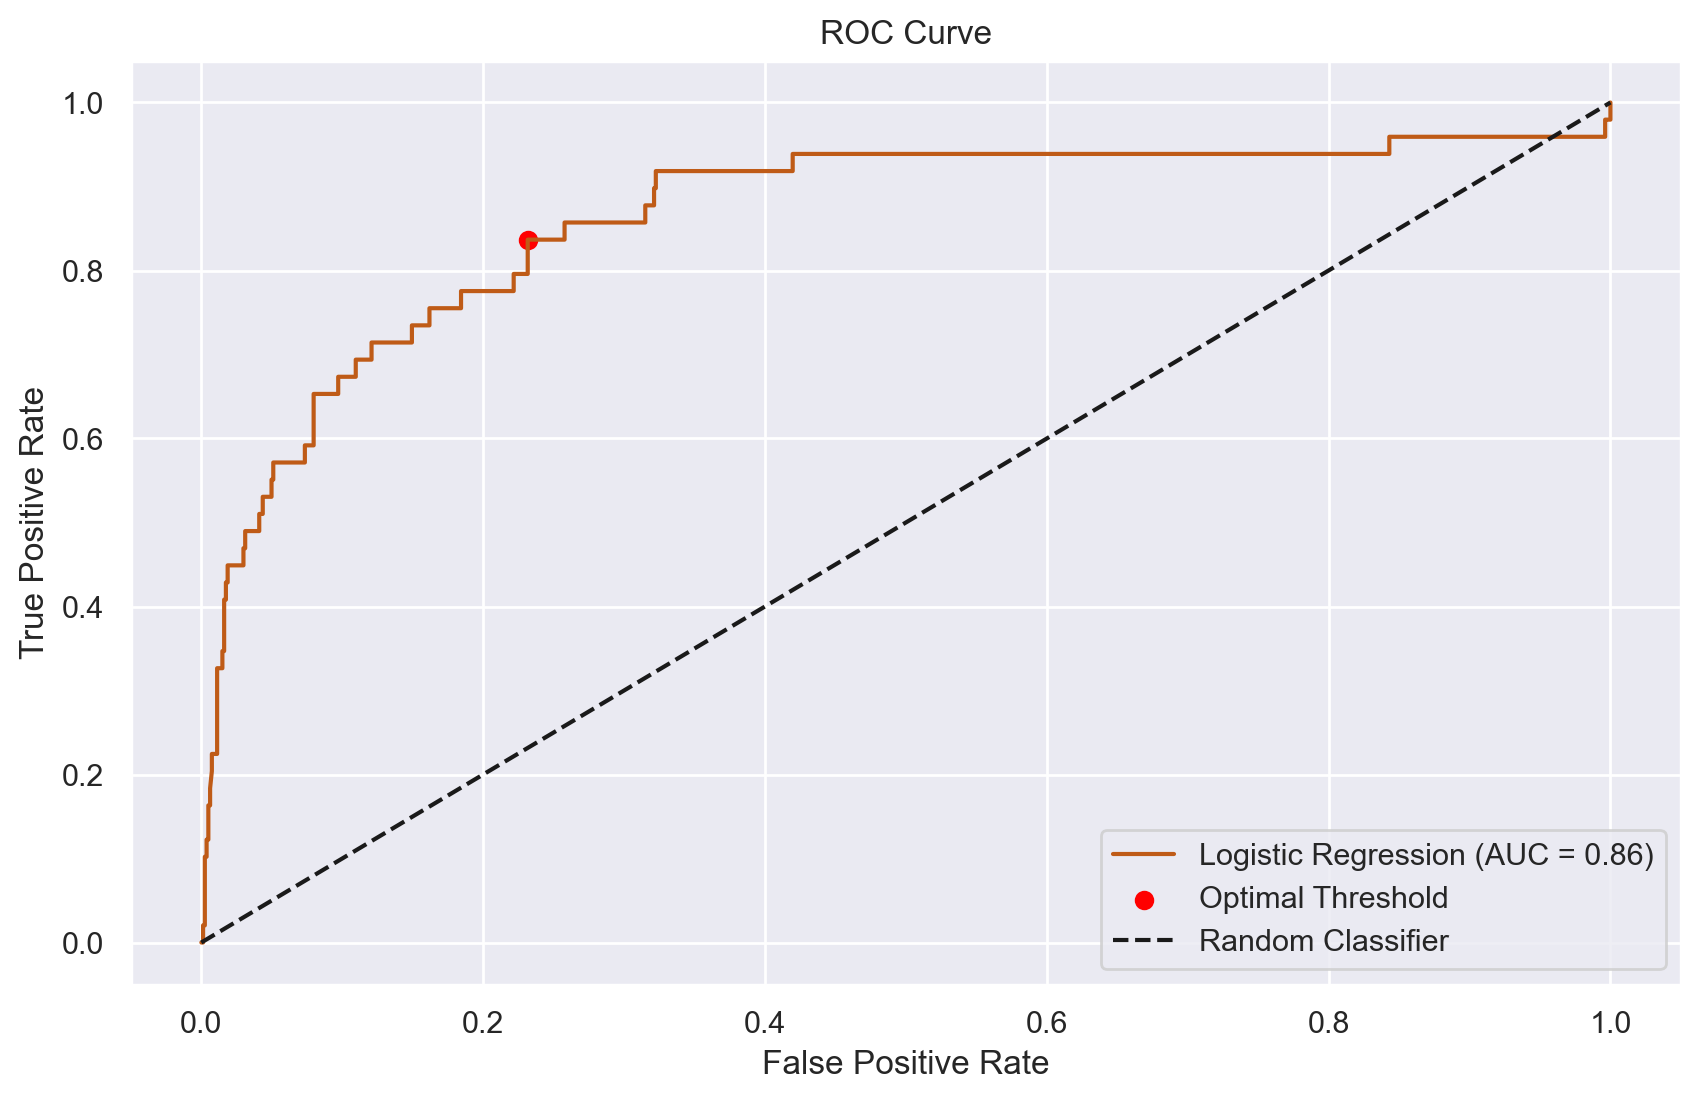

Optimal Threshold: 0.0414


In [131]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Get the predicted probabilities for the positive class
y_pred_logistic_prob = logistic_model.predict_proba(X_test_reduced_scaled)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_logistic_prob)

# Calculate the optimal threshold
j_scores = tpr - fpr
optimal_threshold_index = np.argmax(j_scores)
optimal_threshold = thresholds[optimal_threshold_index]

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc_logistic:.2f})')
plt.scatter(fpr[optimal_threshold_index], tpr[optimal_threshold_index], marker='o', color='red', label='Optimal Threshold')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

print(f'Optimal Threshold: {optimal_threshold:.4f}')

In [133]:
# Classify using the optimal threshold
y_pred_logistic_optimal = (y_pred_logistic_prob >= optimal_threshold).astype(int)

# Evaluate the model with the optimal threshold
accuracy_logistic_optimal = accuracy_score(y_test, y_pred_logistic_optimal)
precision_logistic_optimal = precision_score(y_test, y_pred_logistic_optimal)
recall_logistic_optimal = recall_score(y_test, y_pred_logistic_optimal)
f1_logistic_optimal = f1_score(y_test, y_pred_logistic_optimal)
roc_auc_logistic_optimal = roc_auc_score(y_test, y_pred_logistic_prob)
cm_logistic_optimal = confusion_matrix(y_test, y_pred_logistic_optimal)
classification_report_logistic_optimal = classification_report(y_test, y_pred_logistic_optimal)

print("Logistic Regression Model with Optimal Threshold")
print(f'Accuracy: {accuracy_logistic_optimal:.4f}')
print(f'Precision: {precision_logistic_optimal:.4f}')
print(f'Recall: {recall_logistic_optimal:.4f}')
print(f'F1 Score: {f1_logistic_optimal:.4f}')
print(f'ROC AUC Score: {roc_auc_logistic_optimal:.4f}')
print('Confusion Matrix:')
print(cm_logistic_optimal)
print('Classification Report:')
print(classification_report_logistic_optimal)

Logistic Regression Model with Optimal Threshold
Accuracy: 0.7723
Precision: 0.1806
Recall: 0.8367
F1 Score: 0.2971
ROC AUC Score: 0.8624
Confusion Matrix:
[[617 186]
 [  8  41]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.77      0.86       803
           1       0.18      0.84      0.30        49

    accuracy                           0.77       852
   macro avg       0.58      0.80      0.58       852
weighted avg       0.94      0.77      0.83       852



In [135]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}


rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=1)

In [137]:
print("Best parameters found:")
print(grid_search.best_params_)
print("Best cross-validation accuracy:")
print(grid_search.best_score_)

Best parameters found:
{'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best cross-validation accuracy:
0.9512343439578475


In [139]:
best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print("Random Forest Model Evaluation on Test Set:")
print(f'Accuracy: {accuracy_rf:.4f}')
print(f'Precision: {precision_rf:.4f}')
print(f'Recall: {recall_rf:.4f}')
print(f'F1 Score: {f1_rf:.4f}')

Random Forest Model Evaluation on Test Set:
Accuracy: 0.9460
Precision: 0.5652
Recall: 0.2653
F1 Score: 0.3611


In [141]:
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, 
                                   n_iter=100, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
random_search.fit(X_train, y_train)

print("Best parameters found:")
print(random_search.best_params_)
print("Best cross-validation accuracy:")
print(random_search.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   scoring='accuracy', verbose=1)

Best parameters found:
{'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': True}
Best cross-validation accuracy:
0.9512343439578475


In [143]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Make predictions on test set
y_pred = best_rf.predict(X_test)
y_pred_proba = best_rf.predict_proba(X_test)[:, 1]  # Probability predictions for ROC AUC

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the metrics
print("Model Performance Metrics:")
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC Score: {roc_auc:.4f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_report(y_test, y_pred))

Model Performance Metrics:
Accuracy: 0.9460
Precision: 0.5652
Recall: 0.2653
F1 Score: 0.3611
ROC AUC Score: 0.9584
Confusion Matrix:
[[793  10]
 [ 36  13]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       803
           1       0.57      0.27      0.36        49

    accuracy                           0.95       852
   macro avg       0.76      0.63      0.67       852
weighted avg       0.93      0.95      0.94       852



# PART B: Stock Price Graph Analysis

### Context
Investors face market risk, arising from asset price fluctuations due to economic events, geopolitical developments, and investor sentiment changes. Understanding and analyzing this risk is crucial for informed decision-making and optimizing investment strategiesences change.

### Objective
The objective of this analysis is to conduct Market Risk Analysis on a portfolio of Indian stocks using Python. It uses historical stock price data to understand market volatility and riskiness. Using statistical measures like mean and standard deviation, investors gain a deeper understanding of individual stocks' performance and portfolio variability.

Through this analysis, investors can aim to achieve the following objectives:

Risk Assessment: Analyze the historical volatility of individual stocks and the overall portfolio.
Portfolio Optimization: Use Market Risk Analysis insights to enhance risk-adjusted returns.
Performance Evaluation: Assess portfolio management strategies' effectiveness in mitigating market risk.
Portfolio Performance Monitoring: Monitor portfolio performance over time and adjust as market conditions and risk preferences change.

- Draw a Stock Price Graph (Stock Price vs Time) for the given stocks - Write observations

<Figure size 1400x800 with 0 Axes>

Text(0.5, 1.0, 'Stock Prices Over Time')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Stock Price')

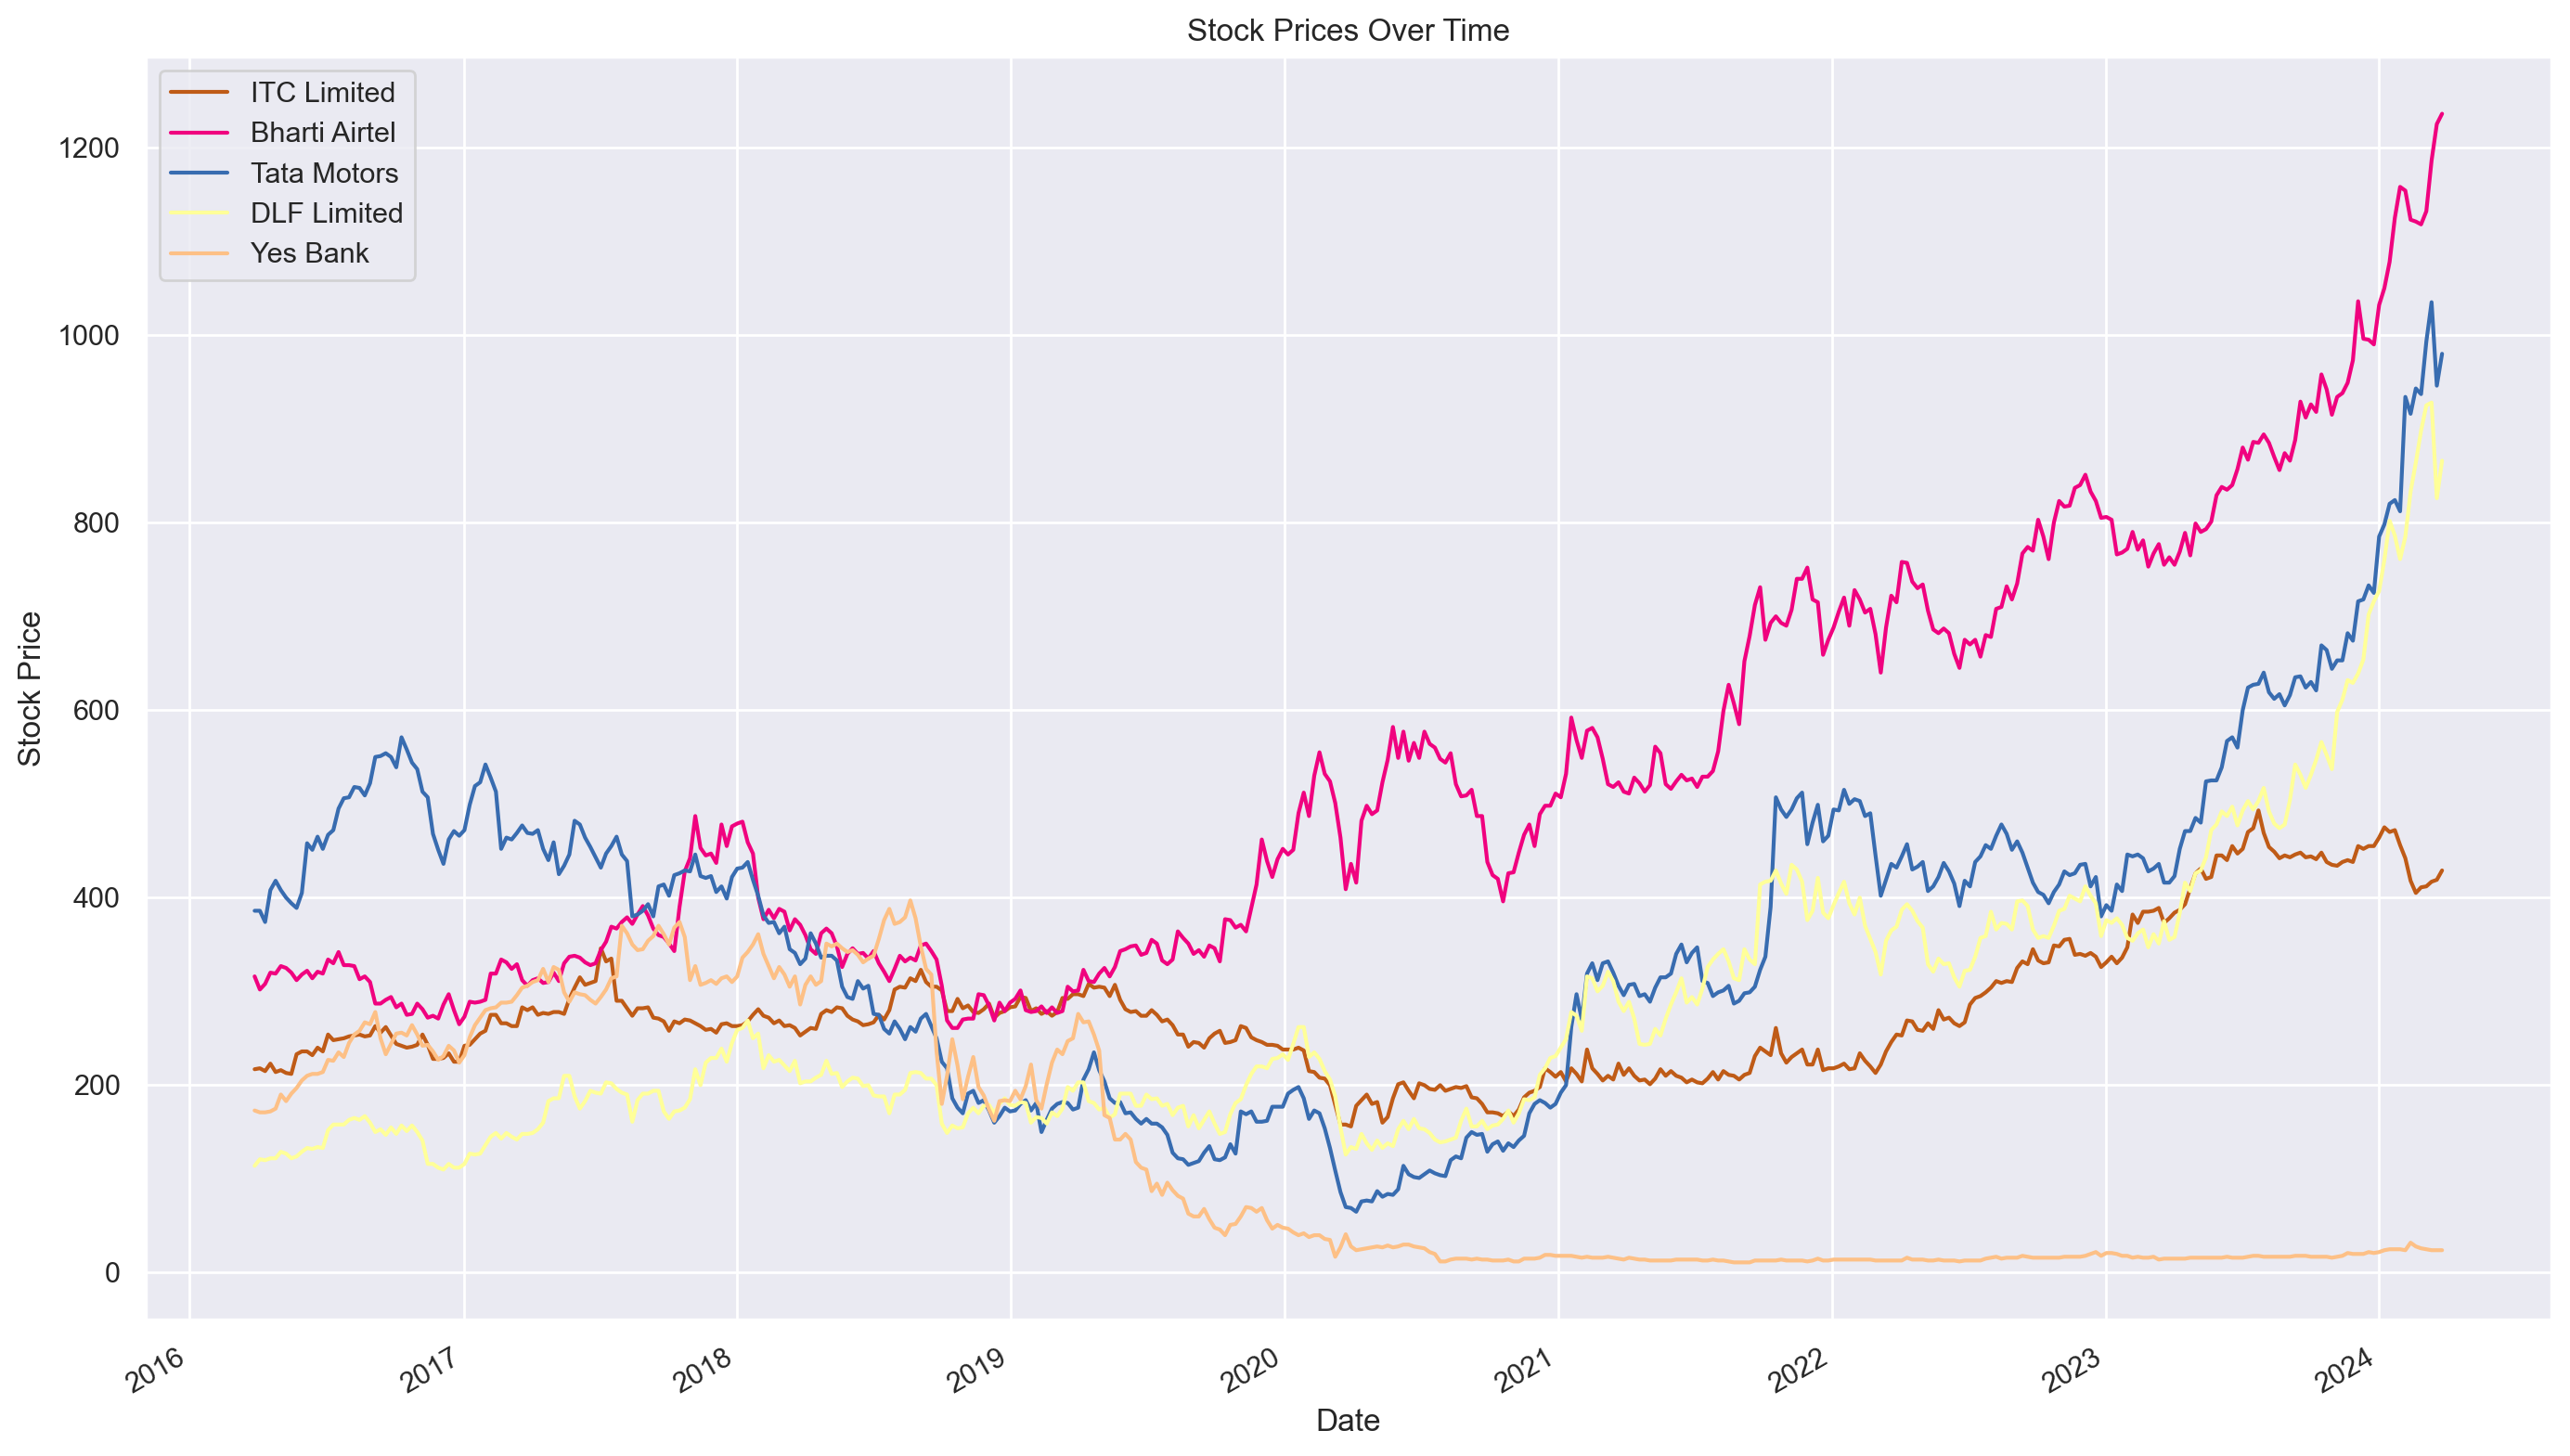

In [148]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('Market_Risk_Data_coded.csv')

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Define stocks to plot
stocks = ['ITC Limited', 'Bharti Airtel', 'Tata Motors', 'DLF Limited', 'Yes Bank']

# Plotting
plt.figure(figsize=(14, 8))

for stock in stocks:
    plt.plot(df['Date'], df[stock], label=stock)

# Add labels and title
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()

# Formatting date on x-axis
plt.gcf().autofmt_xdate()

# Show plot
plt.tight_layout()
plt.show()

### Observations:

ITC Limited: The stock price of ITC Limited appears to have increased steadily over time. Bharti Airtel: The stock price of Bharti Airtel appears to have fluctuated more than the stock price of ITC Limited. However, there is a general upward trend in the stock price over time. Tata Motors: The stock price of Tata Motors appears to be more volatile than the stock prices of ITC Limited and Bharti Airtel. It is difficult to say definitively whether there is an upward or downward trend in the stock price of Tata Motors over time. DLF Limited: The stock price of DLF Limited appears to have been relatively flat over time. Yes Bank: The stock price of Yes Bank appears to be more volatile than the stock prices of the other companies. It is difficult to say definitively whether there is an upward or downward trend in the stock price of Yes Bank over time.

### Stock Returns Calculation and Analysis

In [164]:
# Calculate daily returns
for stock in stocks:
    df[stock + ' Return'] = df[stock].pct_change()

# Display the updated DataFrame with returns
print(df.head())

        Date  ITC Limited  Bharti Airtel  Tata Motors  DLF Limited  Yes Bank  ITC Limited Return  Bharti Airtel Return  Tata Motors Return  DLF Limited Return  Yes Bank Return
0 2016-03-28          217            316          386          114       173                 NaN                   NaN                 NaN                 NaN              NaN
1 2016-04-04          218            302          386          121       171            0.004608             -0.044304            0.000000            0.061404        -0.011561
2 2016-04-11          215            308          374          120       171           -0.013761              0.019868           -0.031088           -0.008264         0.000000
3 2016-04-18          223            320          408          122       172            0.037209              0.038961            0.090909            0.016667         0.005848
4 2016-04-25          214            319          418          122       175           -0.040359             -0.003125  

In [166]:
# Calculate weekly returns
df.set_index('Date', inplace=True)
weekly_df = df.resample('W').last()

# Calculate the weekly returns for each stock
weekly_returns = weekly_df.pct_change().dropna()

# Calculate mean and standard deviation of weekly returns
mean_returns = weekly_returns.mean() * 100  # Convert to percentage
std_returns = weekly_returns.std() * 100  # Convert to percentage

# Print the results
for stock in mean_returns.index:
    print(f"{stock}:")
    print(f"  Mean Weekly Return: {mean_returns[stock]:.3f}%")
    print(f"  Standard Deviation of Weekly Returns: {std_returns[stock]:.3f}%")
    print()

ITC Limited:
  Mean Weekly Return: 0.162%
  Standard Deviation of Weekly Returns: 3.698%

Bharti Airtel:
  Mean Weekly Return: 0.378%
  Standard Deviation of Weekly Returns: 3.943%

Tata Motors:
  Mean Weekly Return: -0.038%
  Standard Deviation of Weekly Returns: 6.058%

DLF Limited:
  Mean Weekly Return: 0.432%
  Standard Deviation of Weekly Returns: 5.979%

Yes Bank:
  Mean Weekly Return: 0.005%
  Standard Deviation of Weekly Returns: 9.885%

ITC Limited Return:
  Mean Weekly Return: nan%
  Standard Deviation of Weekly Returns: nan%

Bharti Airtel Return:
  Mean Weekly Return: nan%
  Standard Deviation of Weekly Returns: nan%

Tata Motors Return:
  Mean Weekly Return: nan%
  Standard Deviation of Weekly Returns: nan%

DLF Limited Return:
  Mean Weekly Return: nan%
  Standard Deviation of Weekly Returns: nan%

Yes Bank Return:
  Mean Weekly Return: nan%
  Standard Deviation of Weekly Returns: nan%



In [168]:
import pandas as pd

# Sample data
data = {
    'Date': ['2017-01-02', '2017-12-29', '2018-12-31', '2019-12-31', '2020-12-31', '2021-12-31', '2022-12-30'],
    'Bharti Airtel': [310, 360, 320, 330, 340, 350, 370],
    'DLF Limited': [120, 150, 170, 160, 180, 200, 210],
    'ITC Limited': [240, 250, 260, 255, 265, 270, 275],
    'Tata Motors': [400, 380, 390, 370, 360, 355, 365],
    'Yes Bank': [80, 70, 60, 55, 50, 45, 40]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

# Resample to yearly frequency and calculate the last closing price of each year
yearly_prices = df.resample('Y').last()

# Calculate the yearly returns for each stock
yearly_returns = yearly_prices.pct_change().dropna() * 100

# Rename the columns to indicate the values are percentages
yearly_returns = yearly_returns.rename(columns=lambda x: x + ' (%)')

print(yearly_returns)

            Bharti Airtel (%)  DLF Limited (%)  ITC Limited (%)  Tata Motors (%)  Yes Bank (%)
Date                                                                                          
2018-12-31         -11.111111        13.333333         4.000000         2.631579    -14.285714
2019-12-31           3.125000        -5.882353        -1.923077        -5.128205     -8.333333
2020-12-31           3.030303        12.500000         3.921569        -2.702703     -9.090909
2021-12-31           2.941176        11.111111         1.886792        -1.388889    -10.000000
2022-12-31           5.714286         5.000000         1.851852         2.816901    -11.111111


<Figure size 1000x600 with 0 Axes>

Text(5, 5, 'ITC Limited')

Text(5, 5, 'Bharti Airtel')

Text(5, 5, 'Tata Motors')

Text(5, 5, 'DLF Limited')

Text(5, 5, 'Yes Bank')

Text(5, 5, 'ITC Limited Return')

Text(5, 5, 'Bharti Airtel Return')

Text(5, 5, 'Tata Motors Return')

Text(5, 5, 'DLF Limited Return')

Text(5, 5, 'Yes Bank Return')

Text(0.5, 1.0, 'Mean vs Standard Deviation of Weekly Returns')

Text(0.5, 0, 'Standard Deviation of Returns (%)')

Text(0, 0.5, 'Mean Return (%)')

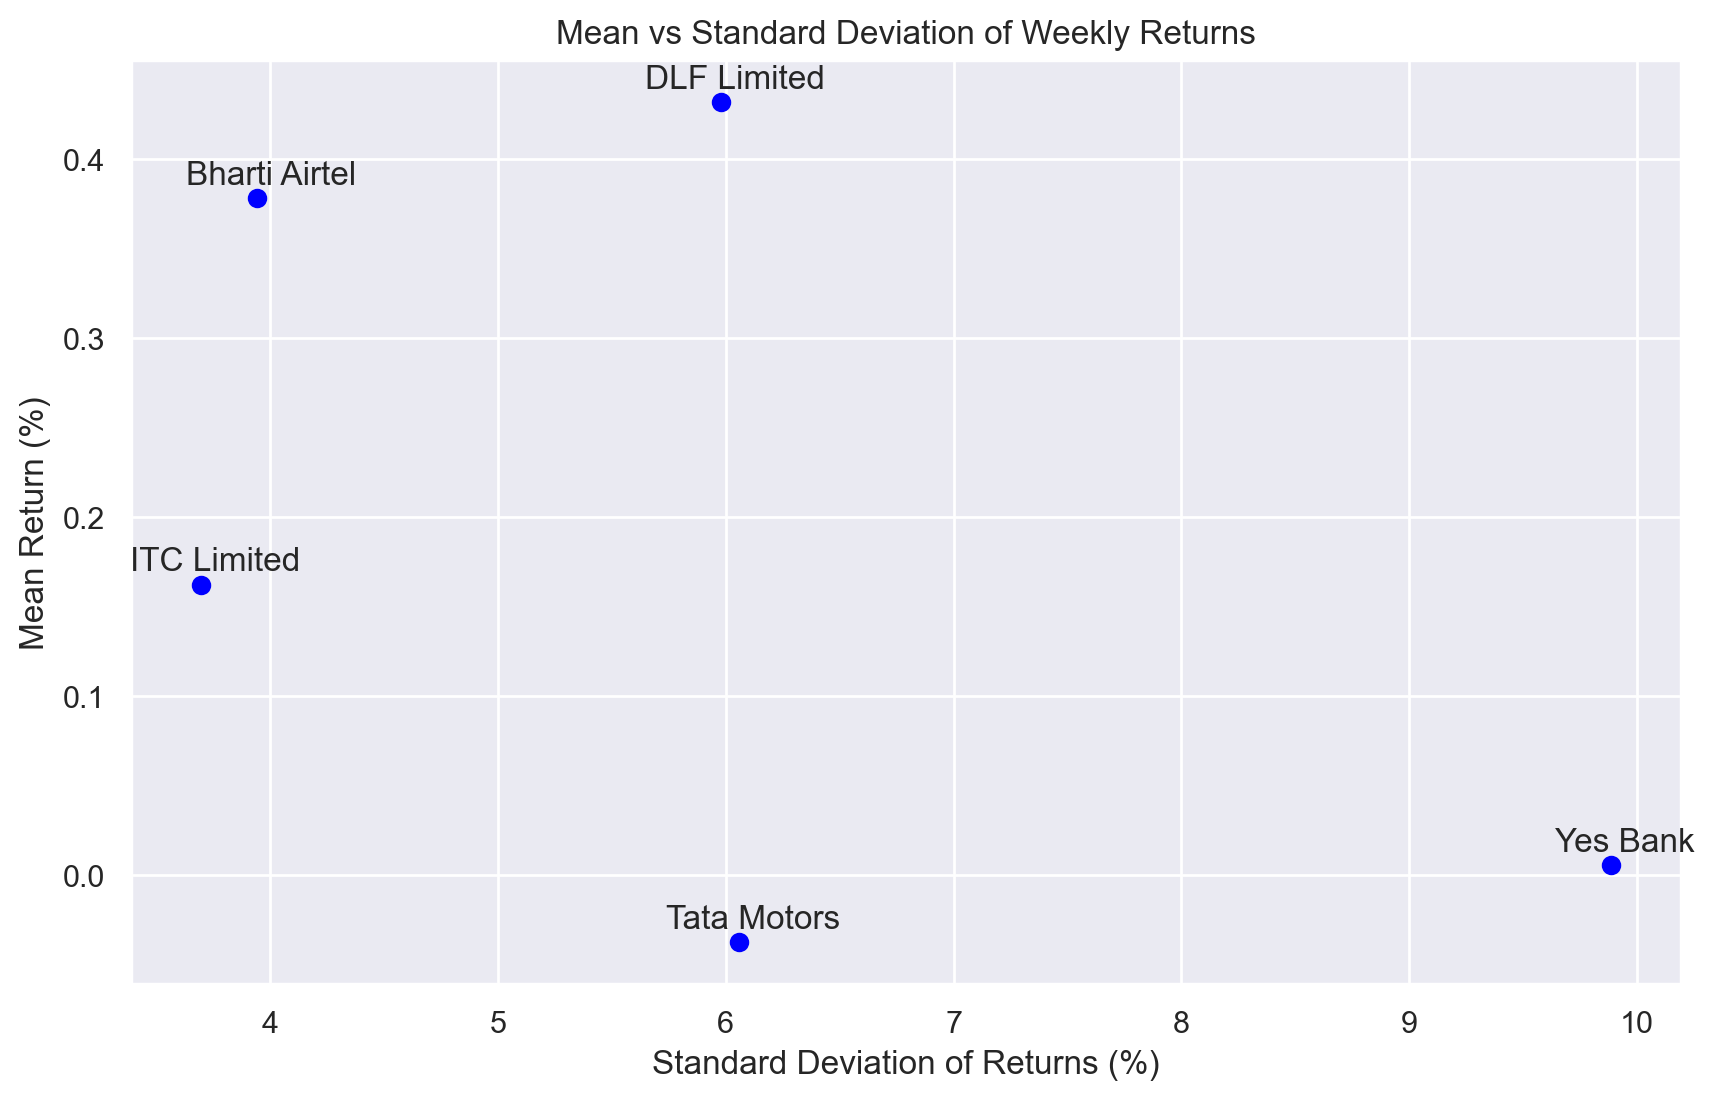

In [170]:
# Plot Mean vs Standard Deviation
plt.figure(figsize=(10, 6))
plt.scatter(std_returns, mean_returns, color='blue')

# Annotate each stock
for stock in mean_returns.index:
    plt.annotate(stock, (std_returns[stock], mean_returns[stock]), textcoords="offset points", xytext=(5,5), ha='center')

plt.title('Mean vs Standard Deviation of Weekly Returns')
plt.xlabel('Standard Deviation of Returns (%)')
plt.ylabel('Mean Return (%)')
plt.grid(True)
plt.show()

### Observations:

- Bharati Airtel:
  Mean Return: Approximately 0.35% Standard Deviation: Around 4.3% This stock has relatively low volatility and a moderate mean return.

- DLF Limited:
  Mean Return: Approximately 0.42% Standard Deviation: Around 6% DLF Limited shows a relatively higher mean return with moderate volatility.

- ITC Limited:
  Mean Return: Approximately 0.2% Standard Deviation: Around 4.5% ITC Limited has low volatility and a low mean return.

- Tata Motors:
  Mean Return: Approximately 0.05% Standard Deviation: Around 6% Tata Motors shows low mean return with moderate volatility.

- Yes Bank:
  Mean Return: Approximately 0.02% Standard Deviation: Around 9.5% Yes Bank has the highest volatility and very low mean return.


 ### Inferences:

### Risk-Return Trade-off:
The plot demonstrates the classic risk-return trade-off where higher potential returns come with higher risk (volatility). DLF Limited has the highest return with moderate risk, while Yes Bank has the highest risk but very low returns.

### Volatility Assessment:
Yes Bank stands out with the highest standard deviation, indicating it is the most volatile stock among the ones plotted. This suggests that Yes Bank is the riskiest investment in terms of price fluctuation.

### Conservative Choices:
Bharti Airtel and ITC Limited both offer relatively lower volatility with moderate returns, making them potentially more attractive for risk-averse investors.

### Performance Insight:
Despite having higher volatility, Tata Motors and Yes Bank show very low mean returns. This might indicate that the higher risk associated with these stocks does not translate into proportional returns.

### Comparative Analysis:
Comparing the stocks, DLF Limited appears to be the best performing in terms of return while maintaining a moderate level of risk. On the other hand, Yes Bank appears to be the least attractive in terms of risk-adjusted returns.

## PART B: Actionable Insights & Recommendations

### Investment Strategy:
Risk-Averse Investors might prefer stocks like Bharti Airtel and ITC Limited due to their lower volatility. Risk-Tolerant Investors might consider DLF Limited for potentially higher returns while keeping an eye on the associated moderate risk. High-Risk Warning: Yes Bank, with its high volatility and low return, may be less attractive unless there are other strategic reasons to invest.